In [2]:
# IMporting libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px


import warnings
from skforecast.plot import set_dark_theme
set_dark_theme()

warnings.filterwarnings('ignore')

In [3]:
Wlb_df = pd.read_csv('C:\\Users\\PC\\Desktop\\Gab\\Impact_of_Remote_Work_on_Mental_Health.csv')
Wlb_df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [4]:
Wlb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [5]:
Wlb_df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


In [6]:
Wlb_df.describe(include='object')

,Employee_ID,Gender,Job_Role,Industry,Work_Location,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Satisfaction_with_Remote_Work,Physical_Activity,Sleep_Quality,Region
count,5000,5000,5000,5000,5000,5000,3804,5000,5000,5000,3371,5000,5000
unique,5000,4,7,7,3,3,3,2,3,3,2,3,6
top,EMP0001,Female,Project Manager,Finance,Remote,High,Burnout,No,Decrease,Unsatisfied,Weekly,Good,Oceania
freq,1,1274,738,747,1714,1686,1280,2553,1737,1677,1755,1687,867


In [7]:
for i in Wlb_df.columns:
    print(Wlb_df[i].value_counts())
    print('================================')

Employee_ID
EMP0001    1
EMP3331    1
EMP3338    1
EMP3337    1
EMP3336    1
          ..
EMP1667    1
EMP1666    1
EMP1665    1
EMP1664    1
EMP5000    1
Name: count, Length: 5000, dtype: int64
Age
53    152
45    149
25    145
23    142
58    138
50    138
24    138
47    138
43    137
48    136
56    136
42    135
57    135
40    135
32    133
30    133
49    132
36    132
22    131
28    131
39    130
51    129
27    129
60    125
52    125
31    124
41    124
46    121
34    120
33    119
59    119
35    119
38    115
55    112
29    112
37    112
44    111
26    109
54     99
Name: count, dtype: int64
Gender
Female               1274
Male                 1270
Prefer not to say    1242
Non-binary           1214
Name: count, dtype: int64
Job_Role
Project Manager      738
Sales                733
Designer             723
HR                   716
Software Engineer    711
Data Scientist       696
Marketing            683
Name: count, dtype: int64
Industry
Finance          747
IT      

In [8]:
Wlb_df.isna().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

In [9]:
Wlb_df.Mental_Health_Condition.value_counts()

Mental_Health_Condition
Burnout       1280
Anxiety       1278
Depression    1246
Name: count, dtype: int64

In [10]:
Wlb_df.Physical_Activity.value_counts()

Physical_Activity
Weekly    1755
Daily     1616
Name: count, dtype: int64

In [11]:
Wlb_df.Mental_Health_Condition.fillna('Normal', inplace = True)

In [12]:
Wlb_df.Physical_Activity.fillna('Never', inplace =True)

In [13]:
Wlb_df.Mental_Health_Condition.value_counts()

Mental_Health_Condition
Burnout       1280
Anxiety       1278
Depression    1246
Normal        1196
Name: count, dtype: int64

In [14]:
Wlb_df.Physical_Activity.value_counts()

Physical_Activity
Weekly    1755
Never     1629
Daily     1616
Name: count, dtype: int64

In [15]:
Wlb_df.isna().sum()

Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64

In [16]:
Wlb_df.duplicated().sum()

0

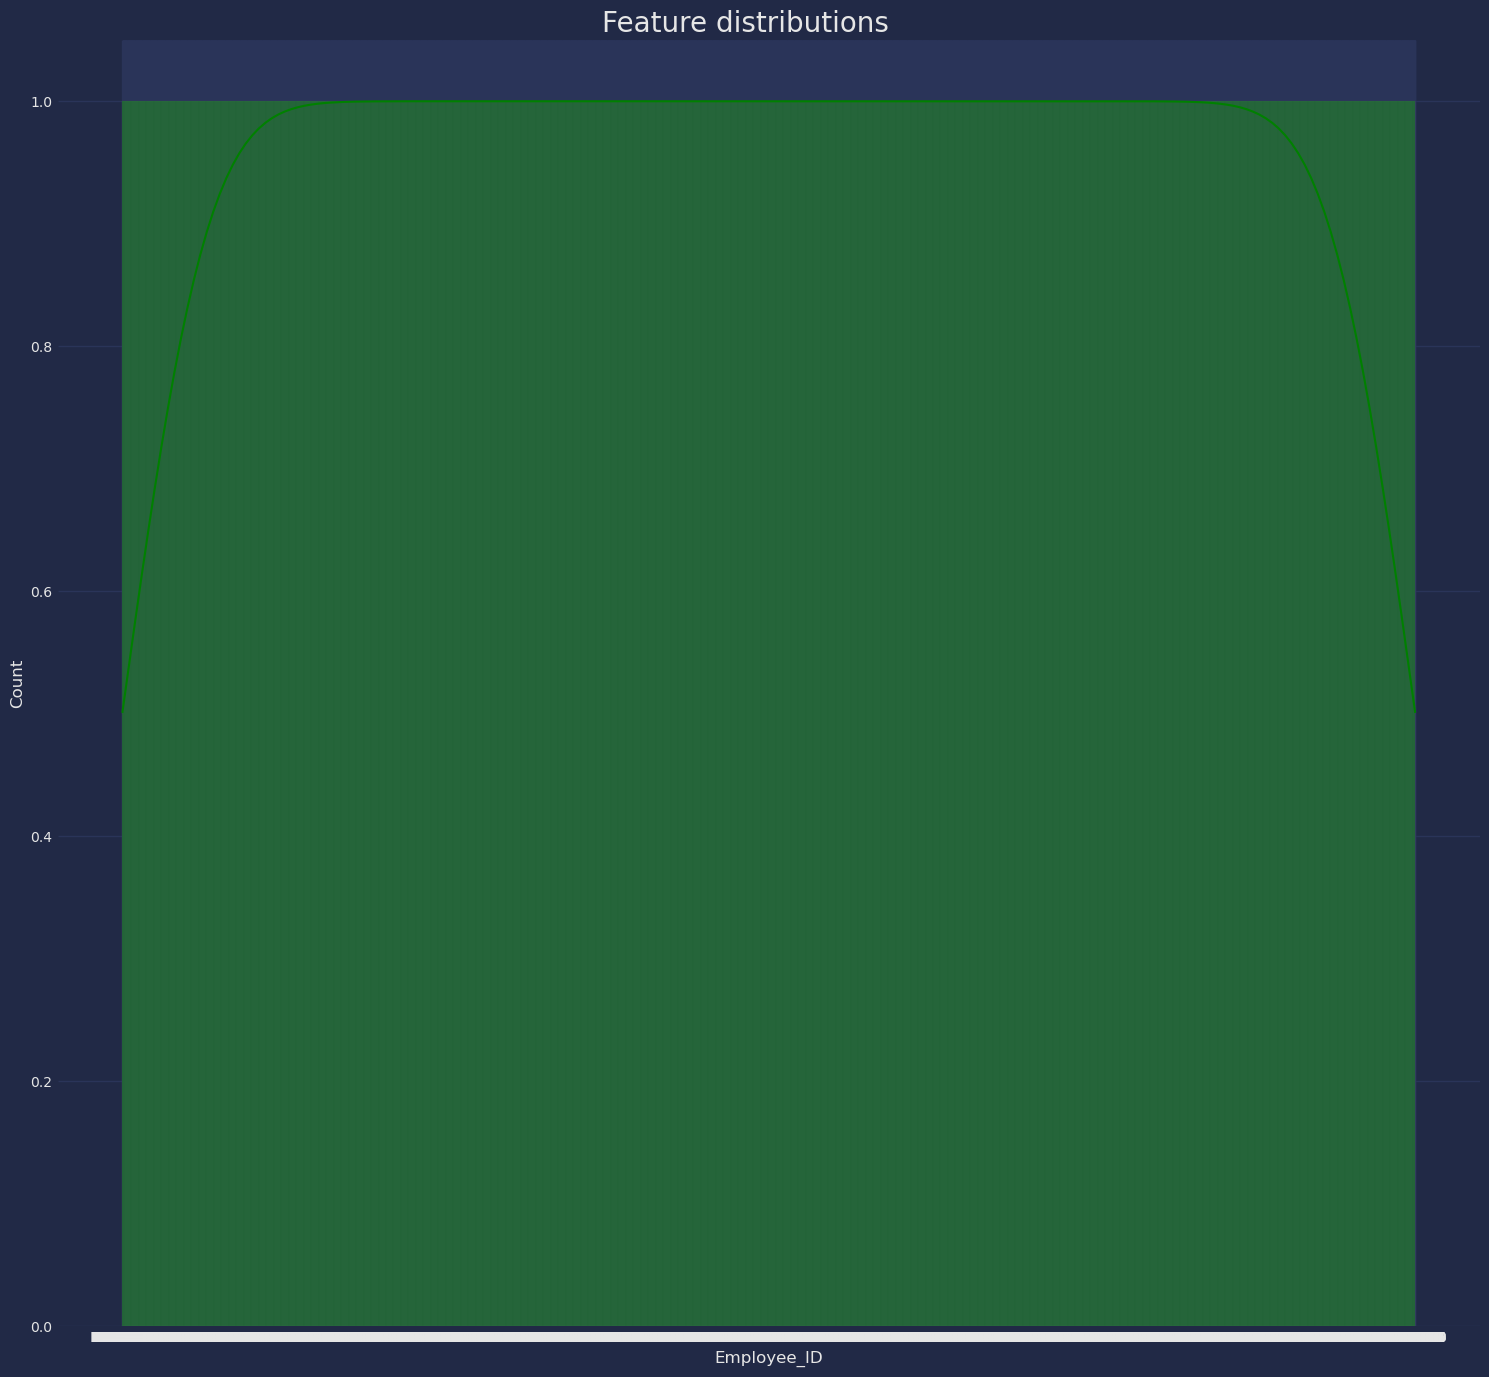

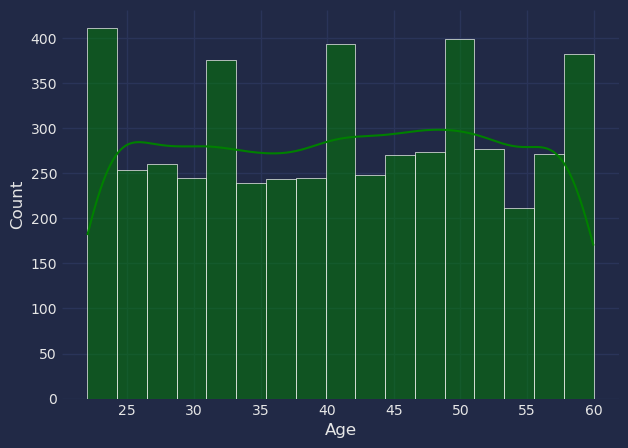

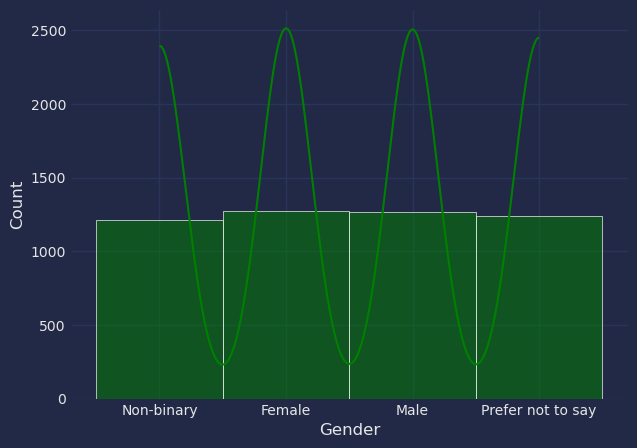

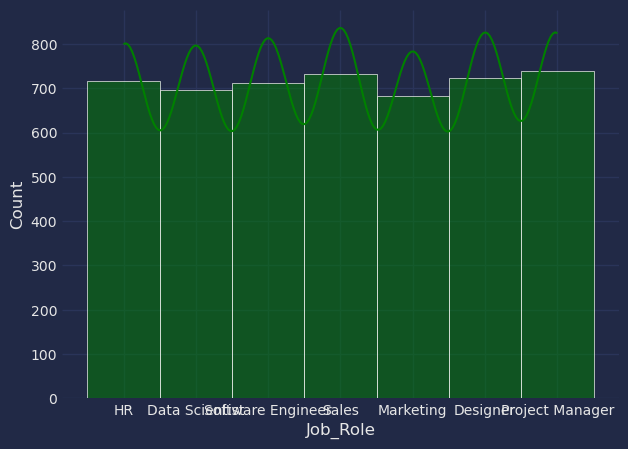

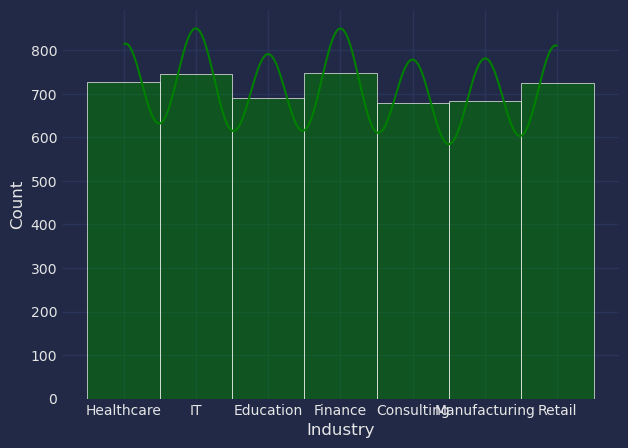

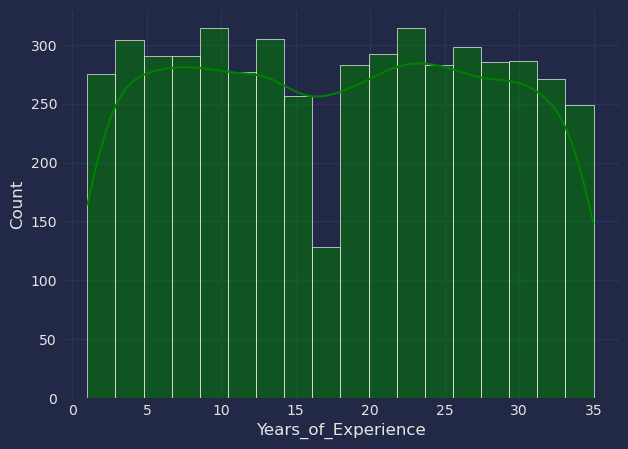

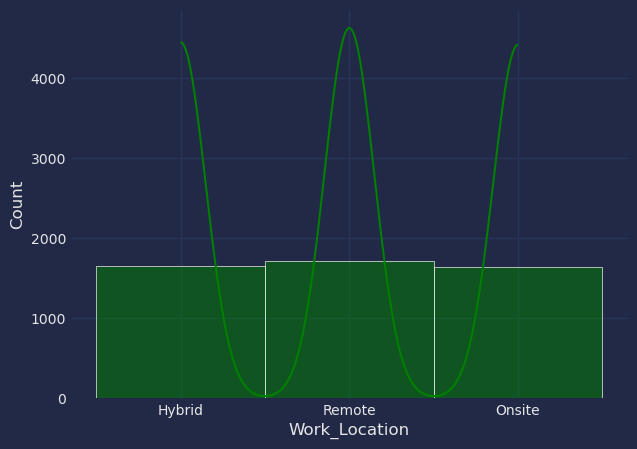

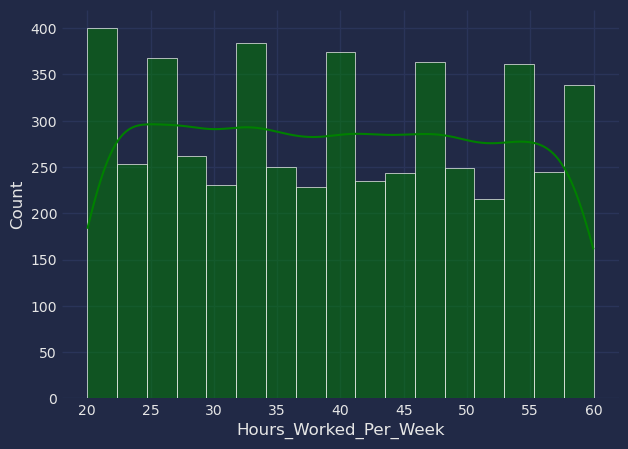

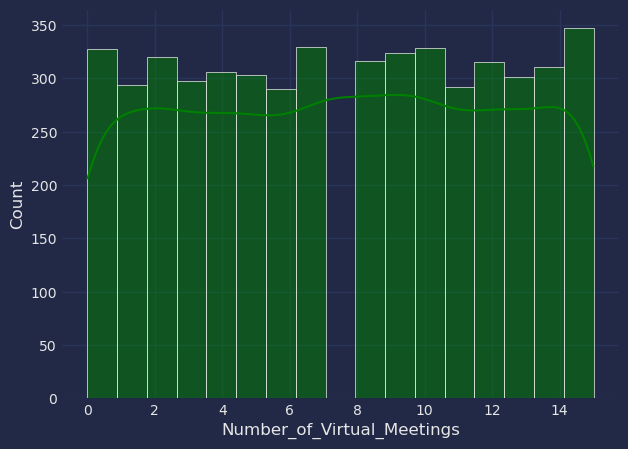

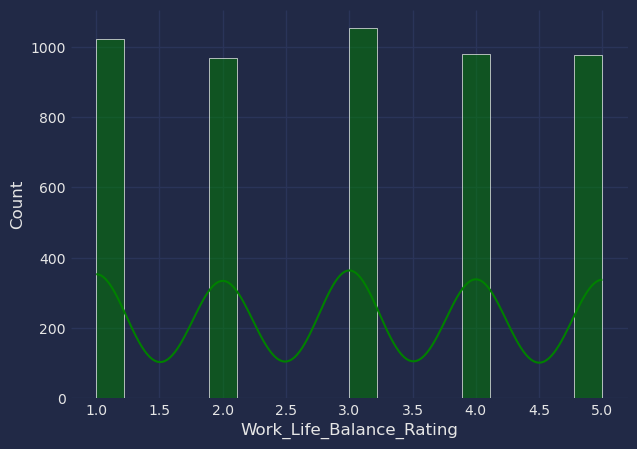

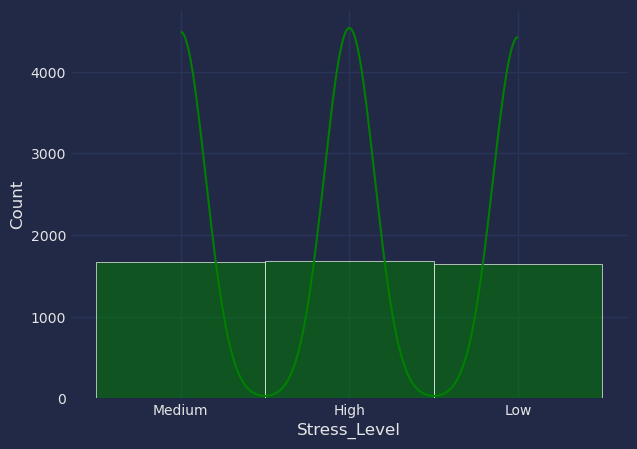

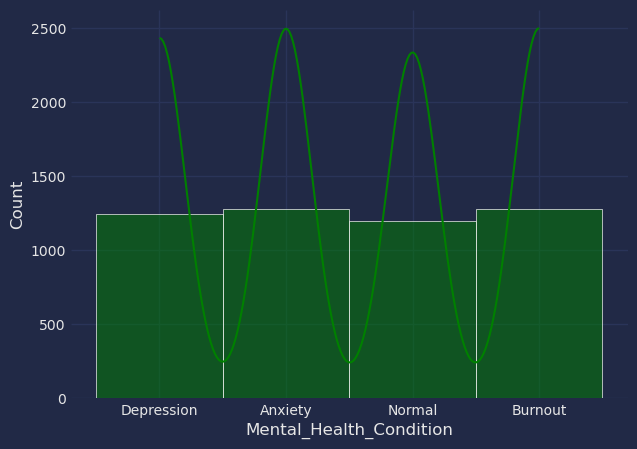

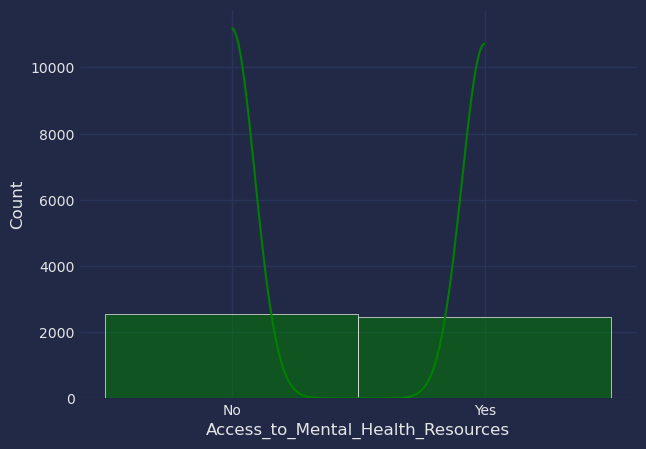

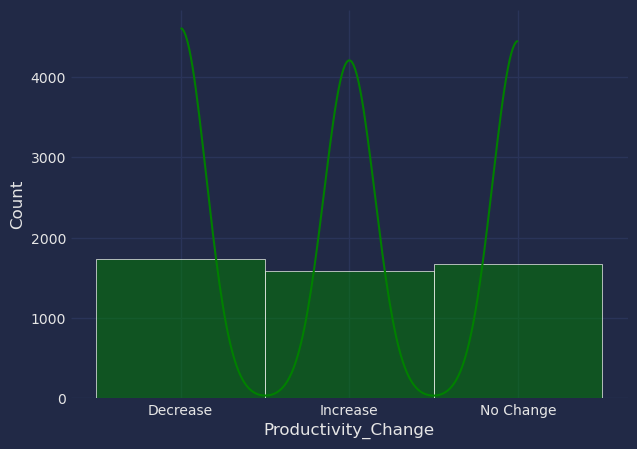

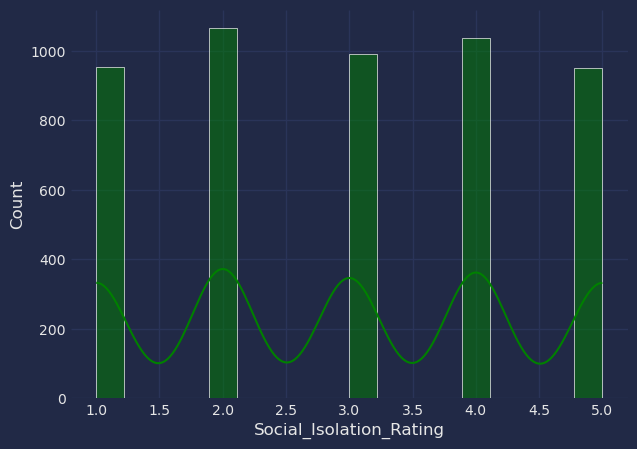

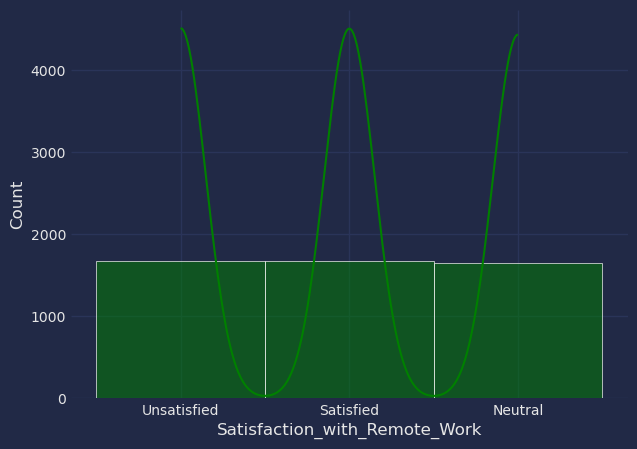

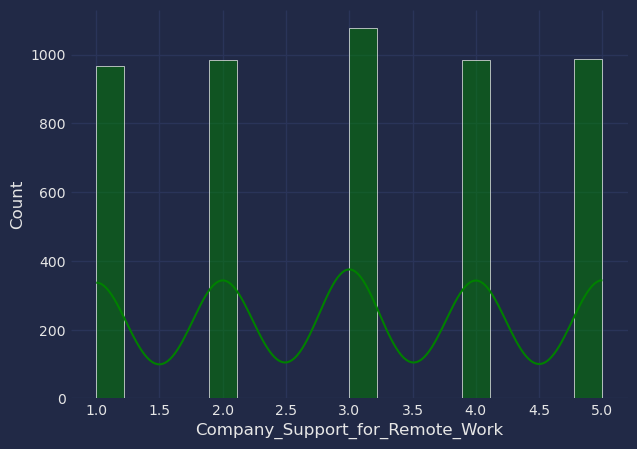

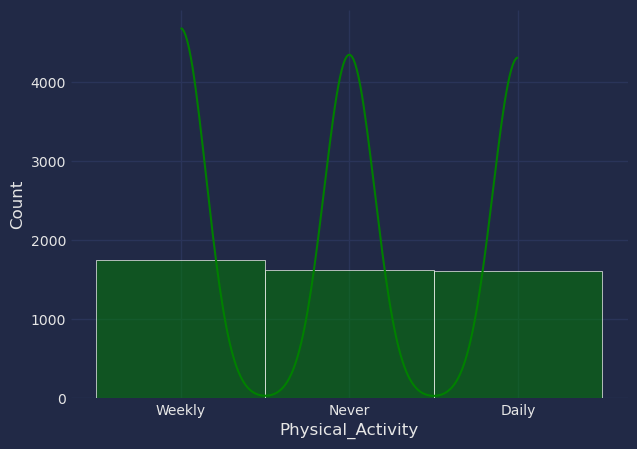

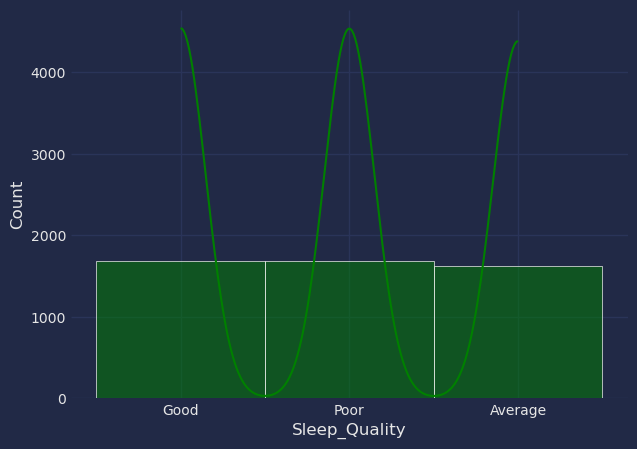

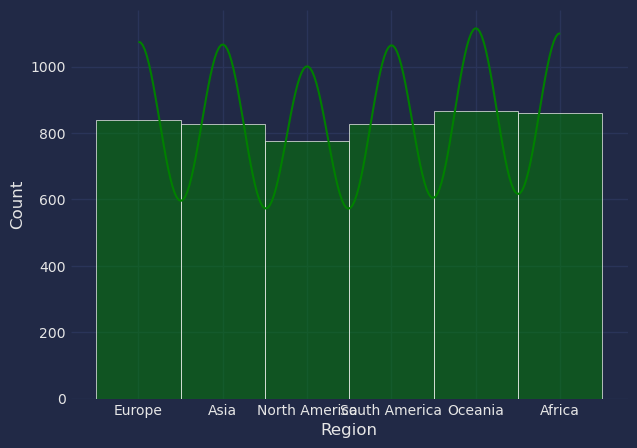

In [17]:
# Figure with subplots
fig=plt.figure(figsize=(15,14))

for i in Wlb_df.columns:
    sns.histplot(Wlb_df[i], kde=True, color='green')
    plt.xlabel(f'{i}')

    # Overall aesthetics
    fig.suptitle('Feature distributions',  size=20)
    fig.tight_layout()  # Improves appearance a bit
    plt.show()

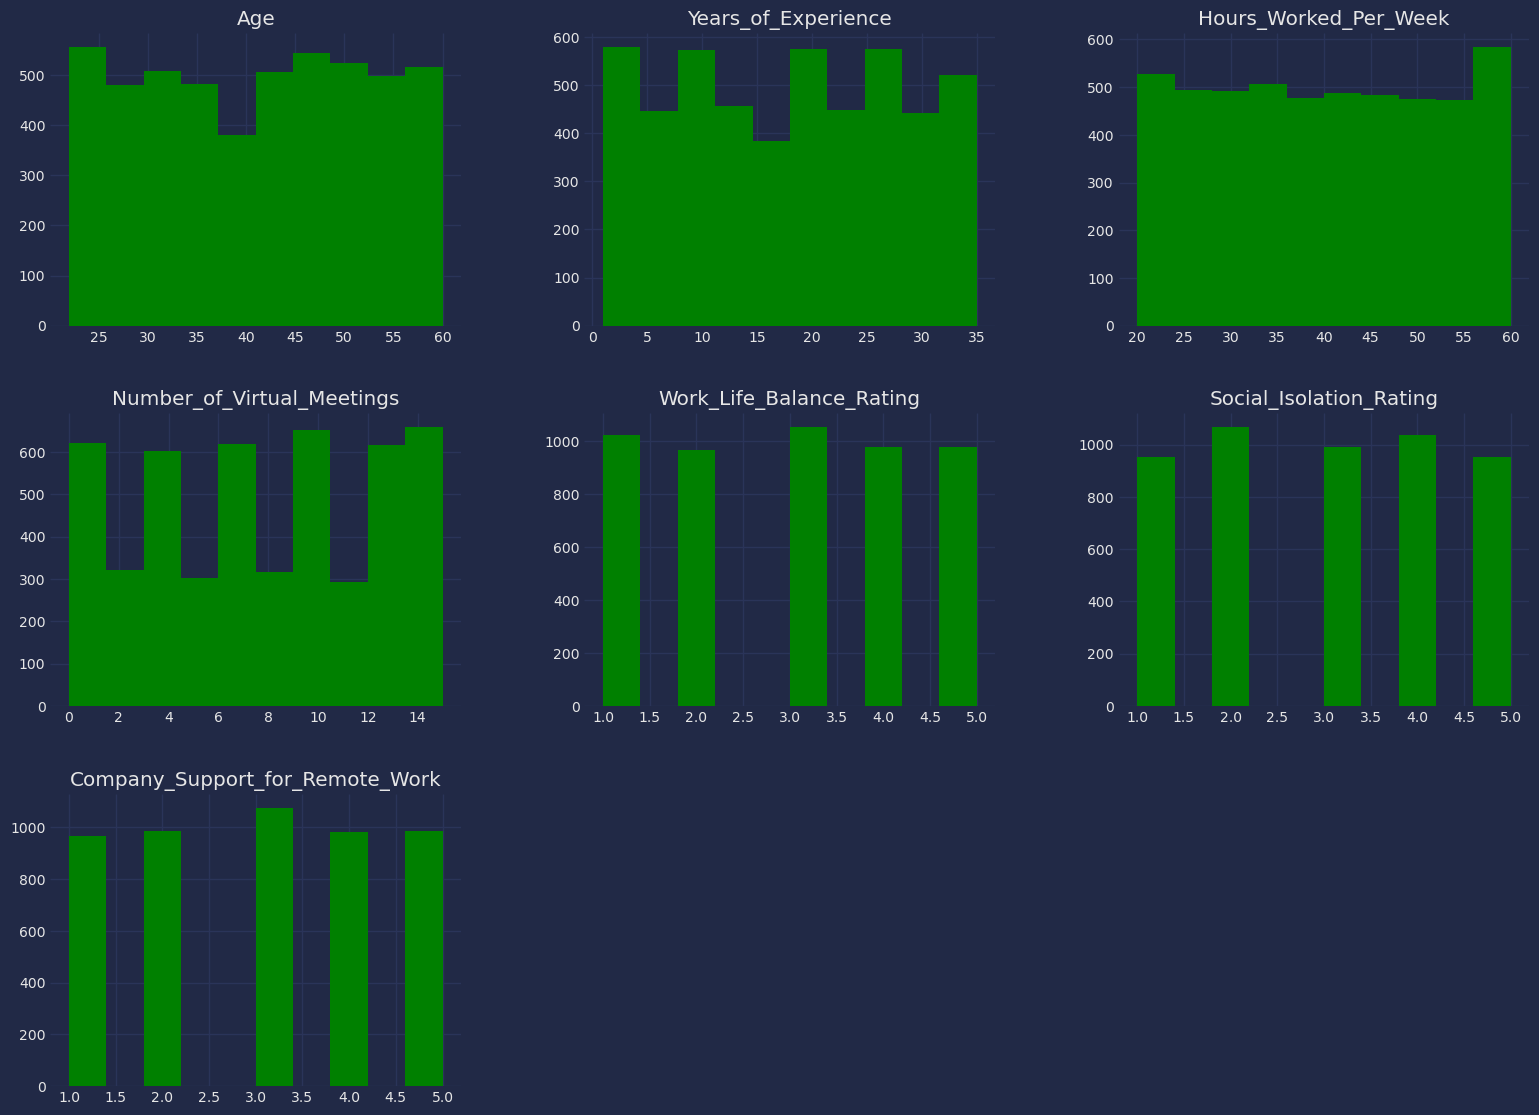

In [18]:
# Histogram plot of all columns
Wlb_df.hist(figsize=(17, 13), color = 'green')
plt.show()

In [19]:
Wlb_df.set_index('Employee_ID', inplace = True)

In [20]:
Wlb_dfX = Wlb_df.copy(deep = True)

In [21]:
# Extracting categorical columns
categorical_columns = Wlb_df.select_dtypes(include=['object'])
col = categorical_columns.columns
col

Index(['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Stress_Level',
       'Mental_Health_Condition', 'Access_to_Mental_Health_Resources',
       'Productivity_Change', 'Satisfaction_with_Remote_Work',
       'Physical_Activity', 'Sleep_Quality', 'Region'],
      dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Apply LabelEncoder to each categorical column
# Convert 'col' from Index to a list of strings
col_list = col.tolist()  # Convert Index to list
# Apply LabelEncoder to each column in the list
for column in col_list:
    Wlb_df[column] = le.fit_transform(Wlb_df[column])
Wlb_df.head()

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
Employee_ID,,,,,,,,,,,,,,,,,,,
EMP0001,32,2,2,3,13,0,47,7,2,2,2,0,0,1,2,1,2,1,2
EMP0002,40,0,0,4,3,2,52,4,1,2,0,0,1,3,1,2,2,1,1
EMP0003,59,2,6,1,22,0,46,11,5,2,0,0,2,4,2,5,1,2,3
EMP0004,27,1,6,2,20,1,32,8,4,0,2,1,1,3,2,3,1,2,2
EMP0005,49,1,5,0,32,1,35,12,2,0,3,1,0,3,2,3,2,0,3


Text(0.5, 1.0, 'Correlation')

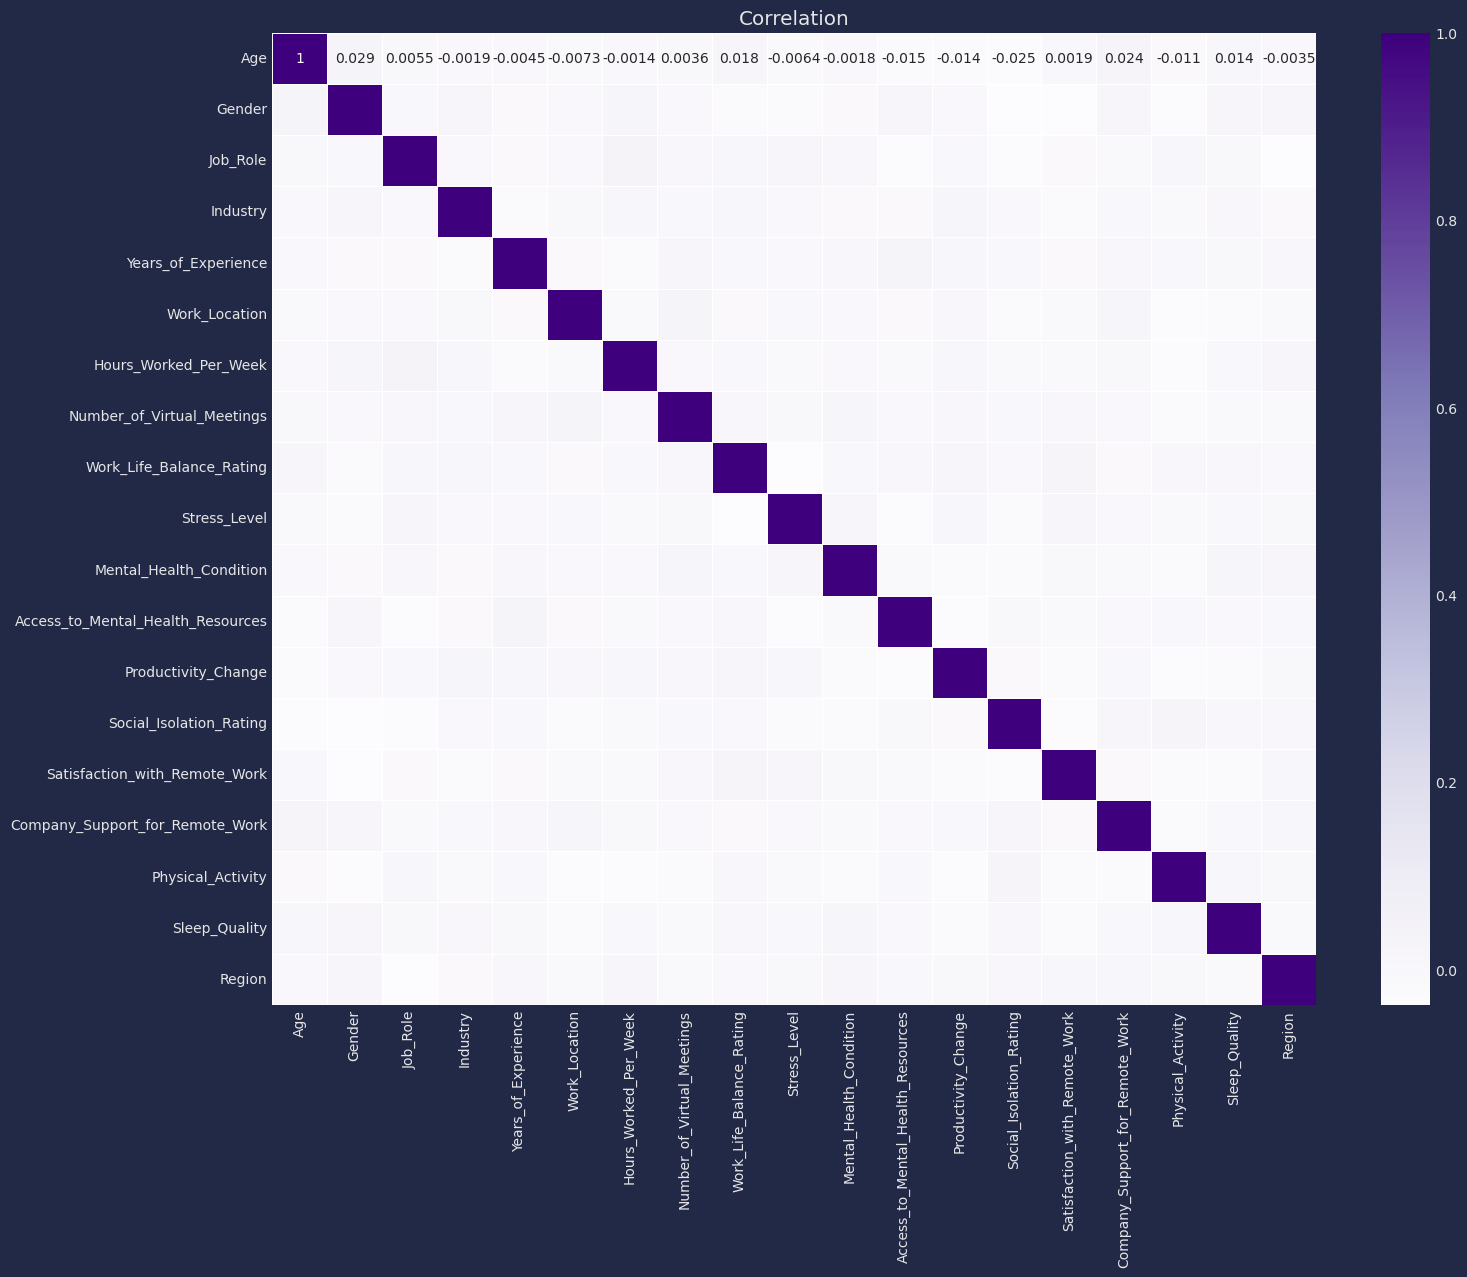

In [23]:
corr=Wlb_df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, annot=True, cmap='Purples', linewidths=0.5)
r.set_title("Correlation")

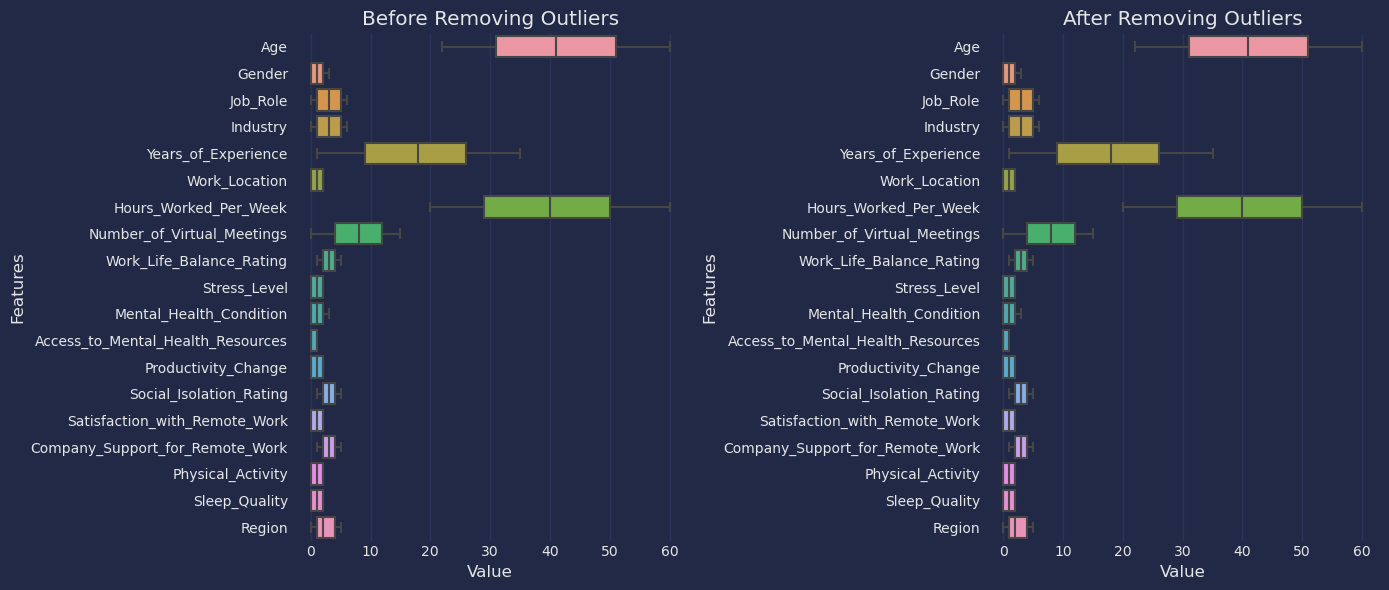

In [24]:
def remove_outliers(df):
    # Create a copy of the original DataFrame for plotting
    df_before = df.copy()

    # Loop through each numerical column
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1  # Calculate the Interquartile Range

        # Define the outlier condition
        outlier_condition = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))

        # Remove outliers from the DataFrame
        df = df[~outlier_condition]

        # Plot before and after removing outliers
        plt.figure(figsize=(14, 6))

        # Plot before removing outliers
        plt.subplot(1, 2, 1)
        colors = ['red', 'green', 'blue', 'orange', 'purple']
        sns.boxplot(data=df_before, orient="h")
        plt.title('Before Removing Outliers')
        plt.xlabel('Value')
        plt.ylabel('Features')

        # Plot after removing outliers
        plt.subplot(1, 2, 2)
        colors = ['red', 'green', 'blue', 'orange', 'purple']
        sns.boxplot(data=df, orient="h")
        plt.title('After Removing Outliers')
        plt.xlabel('Value')
        plt.ylabel('Features')

        plt.tight_layout()
        plt.show()

        return df

# Example usage:
# Assuming train_data is your DataFrame
# Replace train_data with your actual DataFrame variable
Wlb_df_cleaned = remove_outliers(Wlb_df)


### Clustering

In [26]:
Wlb_clustering = Wlb_df.drop(columns = 'Work_Life_Balance_Rating')
Wlb_clustering.head()

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
Employee_ID,,,,,,,,,,,,,,,,,,
EMP0001,32,2,2,3,13,0,47,7,2,2,0,0,1,2,1,2,1,2
EMP0002,40,0,0,4,3,2,52,4,2,0,0,1,3,1,2,2,1,1
EMP0003,59,2,6,1,22,0,46,11,2,0,0,2,4,2,5,1,2,3
EMP0004,27,1,6,2,20,1,32,8,0,2,1,1,3,2,3,1,2,2
EMP0005,49,1,5,0,32,1,35,12,0,3,1,0,3,2,3,2,0,3


In [27]:
# Importing more libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [28]:
# Scaling data
scaler = StandardScaler()

scaled_data = scaler.fit_transform(Wlb_clustering)

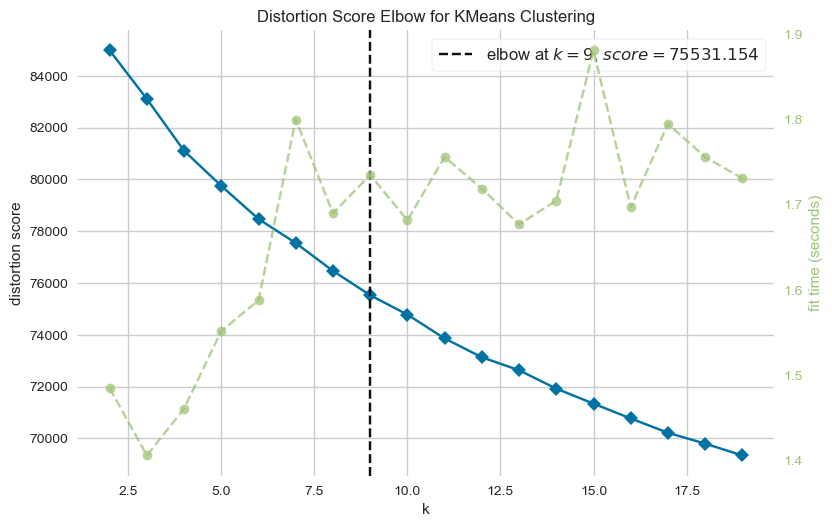

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
km = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(km, k=(2,20), timings= True)
visualizer.fit(scaled_data)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [30]:
# Instantiate the KMeans for 5 clusters
km = KMeans(n_clusters=11, random_state=0)
# Fit the KMeans model
km.fit_predict(scaled_data)
# Calculate Silhoutte Score
km_score = silhouette_score(scaled_data, km.labels_, metric='euclidean')
# Print the score
print(f'Silhouette Score: {km_score}')

Silhouette Score: 0.037577359811241225


In [31]:
# Training model
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6)
GMM_pred = gmm.fit_predict(scaled_data)
GMM_score = silhouette_score(scaled_data, GMM_pred, metric='euclidean')
GMM_score

0.019808723861995493

In [32]:
from sklearn.cluster import OPTICS

# Initialize the OPTICS clustering model
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)

# Fit the model to the data
optics.fit(scaled_data)

# Get the cluster labels
optics_labels = optics.labels_
np.unique(optics_labels)

array([0])

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
# Step 3: Standardize the data
X_scaled = StandardScaler().fit_transform(Wlb_clustering)

# Step 4: Define parameter ranges
eps_values = np.arange(0.1, 1.5, 0.2)
min_samples_values = range(2, 8)

best_score = -1
best_params = (None, None)

# Step 5: Grid search for best parameters
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X_scaled)

        # Only calculate silhouette score if there are more than 1 cluster
        if len(set(cluster_labels)) > 1:
            score = silhouette_score(X_scaled, cluster_labels)
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

# Step 6: Print the best parameters and score
print(f'Best Silhouette Score: {best_score:.3f} with eps={best_params[0]} and min_samples={best_params[1]}')

Best Silhouette Score: -1.000 with eps=None and min_samples=None


In [34]:
#Defining model and assigning each data point to a cluster
cluster_DB = DBSCAN(eps = 1.3000000000000003, min_samples = 5).fit(X_scaled)

# get all of the unique clusters
labels_dB = cluster_DB.labels_

set(cluster_DB.labels_)

{-1}

In [35]:
from sklearn.cluster import SpectralClustering

#Defining model and assigning each data point to a cluster
cluster_SC = SpectralClustering(n_clusters=4,assign_labels='discretize',random_state=0).fit(scaled_data)

# Getting all unuique clusters
label_SC = cluster_SC.labels_
set(cluster_SC.labels_)

# Model evaluation
silhouette_score(scaled_data, label_SC)

-0.03834184507865984

**PCA**

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
# Create principal components
pca = PCA(n_components = 3)

# Scaling data
mm_scaler = MinMaxScaler()

# Transforming
scaled = mm_scaler.fit_transform(Wlb_clustering)

X_pca = pca.fit_transform(scaled)
    # Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
loadings = pd.DataFrame(
pca.components_.T,  # transpose the matrix of loadings
columns=component_names,  # so the columns are the principal components
index=Wlb_clustering.columns,  # and the rows are the original features
    )
loadings

,PC1,PC2,PC3
Age,-0.008643,-0.014817,-0.008132
Gender,0.029367,0.015545,0.155887
Job_Role,-0.034928,-0.030103,0.008351
Industry,-0.018867,0.032322,0.077102
Years_of_Experience,0.033827,0.005398,0.033070
Work_Location,-0.032973,0.449344,0.090897
Hours_Worked_Per_Week,-0.009612,0.008791,0.046122
Number_of_Virtual_Meetings,-0.005042,0.031408,-0.017996
Stress_Level,-0.072993,0.173408,-0.504165
Mental_Health_Condition,-0.008841,-0.010233,-0.105544


In [38]:
X_pca.head()

,PC1,PC2,PC3
0,-0.475307,-0.615052,-0.843308
1,-0.549250,-0.006902,-0.177674
2,-0.556613,-0.046255,-0.276404
3,0.517724,-0.166895,-0.085071
4,0.582082,-0.371083,-0.499384


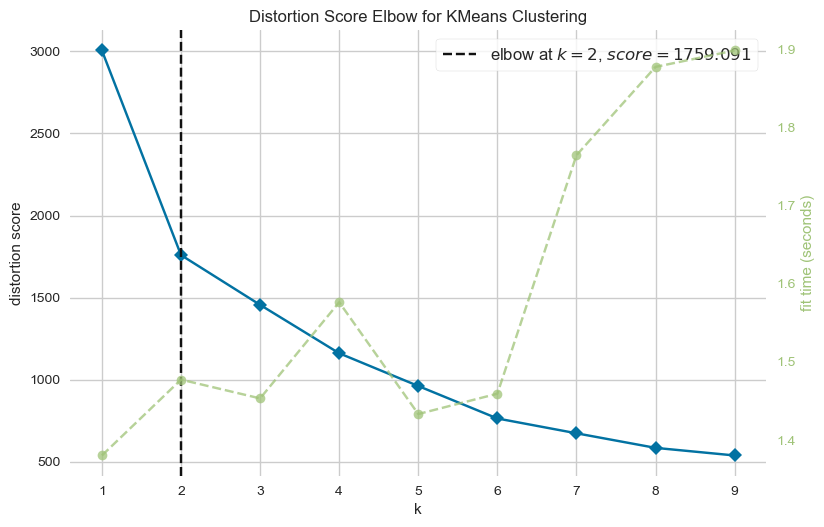

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
visualizer = KElbowVisualizer(km, k=(1, 10), timings= True) # Change k range
visualizer.fit(X_pca)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [40]:
# Instantiate the KMeans for 5 clusters
km = KMeans(n_clusters=2, random_state=0)
# Fit the KMeans model
km.fit_predict(X_pca)
# Calculate Silhoutte Score
km_score = silhouette_score(X_pca, km.labels_, metric='euclidean')
# Print the score
print(f'Silhouette Score: {km_score}')

Silhouette Score: 0.41961078835096416


In [41]:
# Training model
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6)
GMM_pred = gmm.fit_predict(X_pca)
GMM_score = silhouette_score(X_pca, GMM_pred, metric='euclidean')
GMM_score

0.30947814485175323

In [42]:
# Attaching Kmeans clusters to copied data
Wlb_df["clusters"] = km.labels_
Wlb_df

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,clusters
Employee_ID,,,,,,,,,,,,,,,,,,,,
EMP0001,32,2,2,3,13,0,47,7,2,2,2,0,0,1,2,1,2,1,2,1
EMP0002,40,0,0,4,3,2,52,4,1,2,0,0,1,3,1,2,2,1,1,1
EMP0003,59,2,6,1,22,0,46,11,5,2,0,0,2,4,2,5,1,2,3,1
EMP0004,27,1,6,2,20,1,32,8,4,0,2,1,1,3,2,3,1,2,2,0
EMP0005,49,1,5,0,32,1,35,12,2,0,3,1,0,3,2,3,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMP4996,32,1,5,0,4,1,24,2,5,0,1,1,0,4,0,1,2,0,1,0
EMP4997,39,0,5,3,27,1,48,15,1,1,2,1,0,1,1,1,1,0,0,0
EMP4998,42,0,5,3,21,0,34,1,4,0,1,0,1,3,1,1,0,2,4,1


In [43]:
Wlb_df.clusters.value_counts()

clusters
1    2553
0    2447
Name: count, dtype: int64

In [44]:
Comparison = pd.concat([Wlb_df['clusters'], Wlb_dfX['Work_Life_Balance_Rating']], axis=1, ignore_index=True)
Comparison.head(20)

,0,1
Employee_ID,,
EMP0001,1,2
EMP0002,1,1
EMP0003,1,5
EMP0004,0,4
EMP0005,0,2
EMP0006,1,4
EMP0007,0,3
EMP0008,1,3
EMP0009,0,2


In [45]:
Wlb_df.rename(columns = {'clusters':'cluster_ratings'}, inplace = True)

In [46]:
Cluster_group = Wlb_df.groupby('cluster_ratings')
First = Cluster_group.get_group(0)
Second = Cluster_group.get_group(1)
# Third = Cluster.get_group(2)

In [47]:
pd.concat([First.mean(), Second.mean()], axis=1)

,0,1
Age,40.816919,41.165687
Gender,1.503474,1.466902
Job_Role,2.962403,3.070114
Industry,2.998774,3.049354
Years_of_Experience,18.138537,17.495495
Work_Location,1.002452,1.023110
Hours_Worked_Per_Week,39.551287,39.675284
Number_of_Virtual_Meetings,7.552922,7.564826
Work_Life_Balance_Rating,2.995505,2.973365
Stress_Level,0.973028,1.019193


Text(0.5, 1.0, 'Correlation')

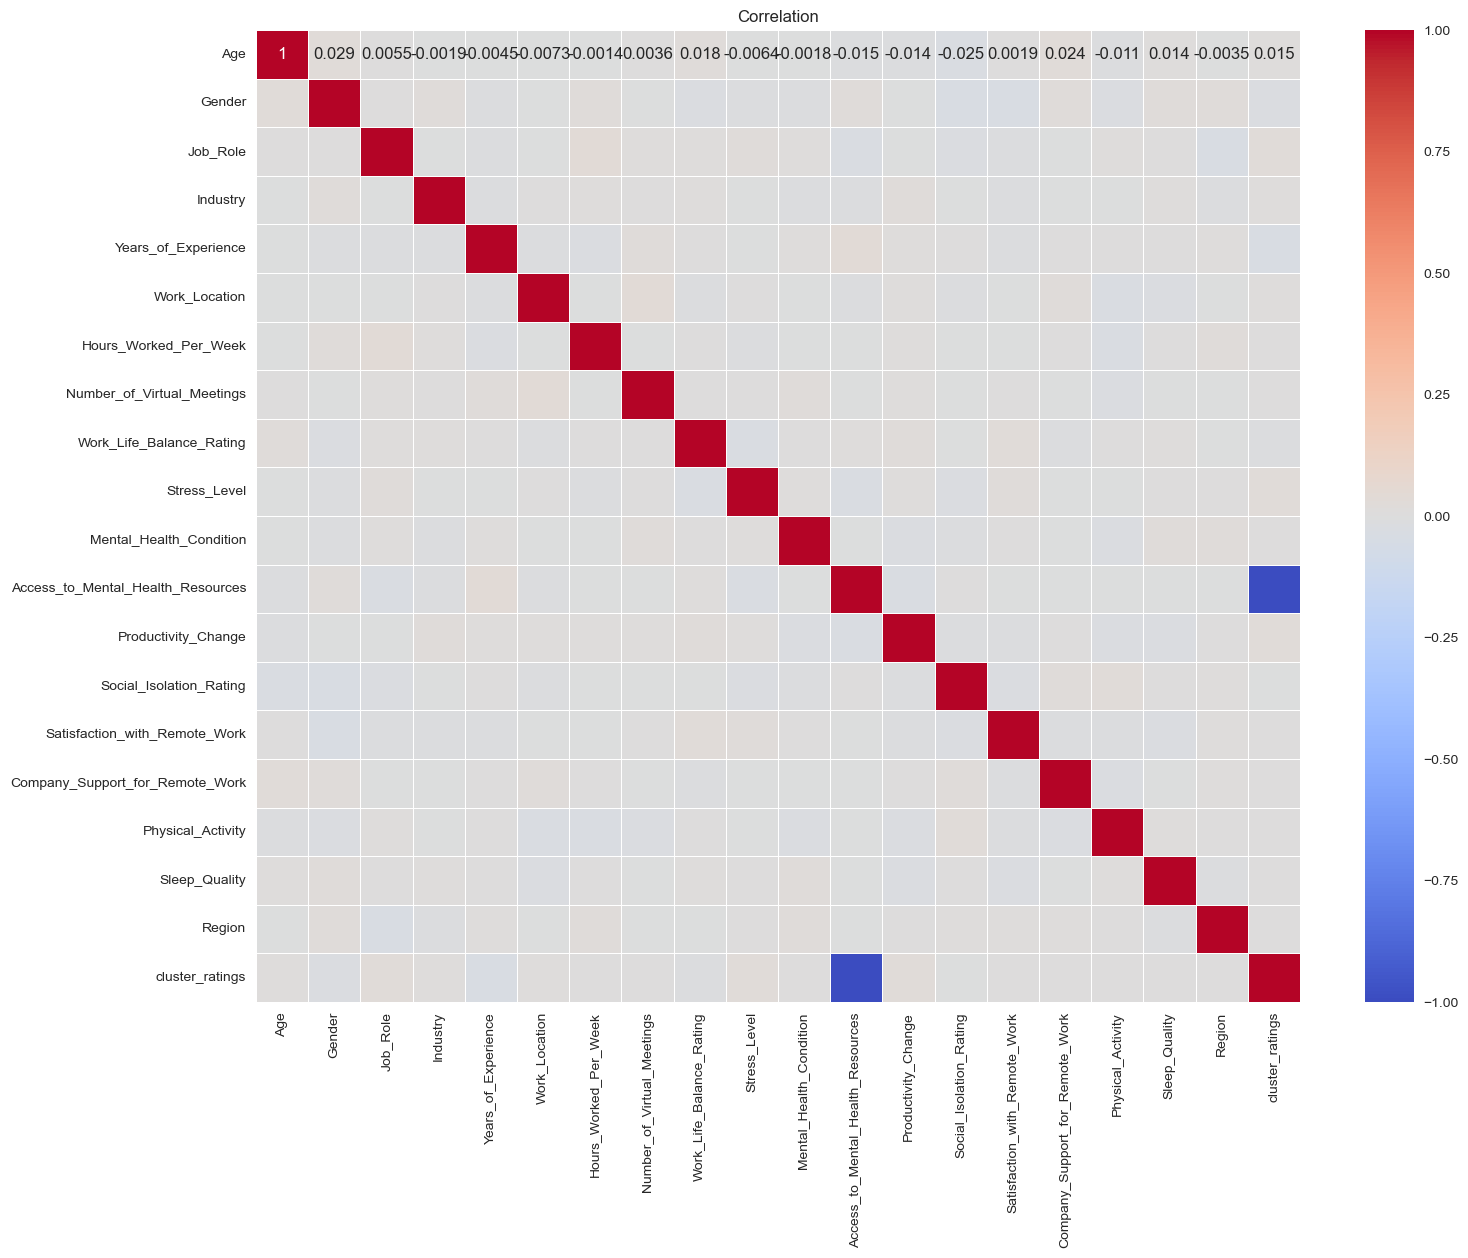

In [48]:
corr=Wlb_df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
r.set_title("Correlation")

Text(0.5, 1.0, 'Correlation of PCA data')

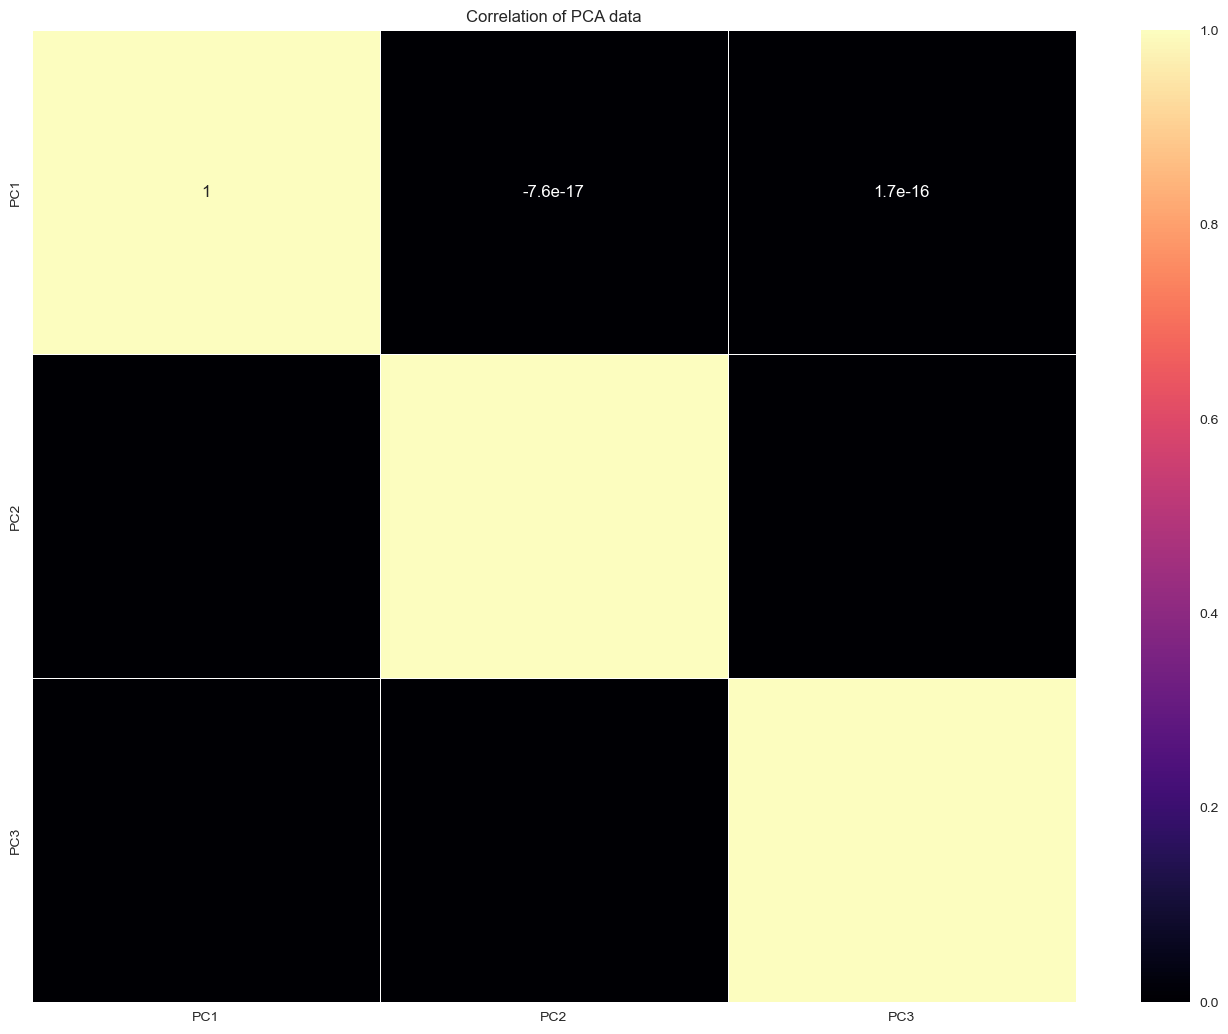

In [49]:
corr=X_pca.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, annot=True, cmap='magma', linewidths=0.5)
r.set_title("Correlation of PCA data")

**Further preprocessing**

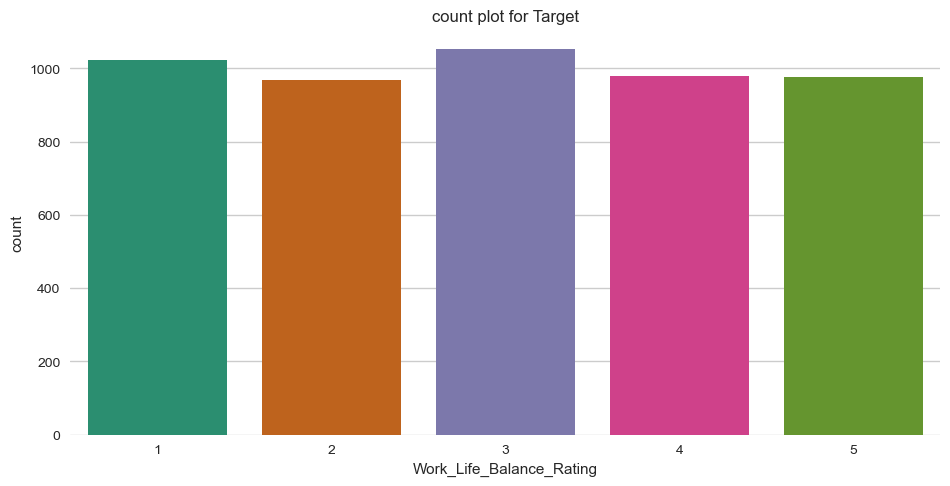

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(data=Wlb_df_cleaned, x='Work_Life_Balance_Rating',palette = "Dark2")
plt.title("count plot for Target")
plt.show()

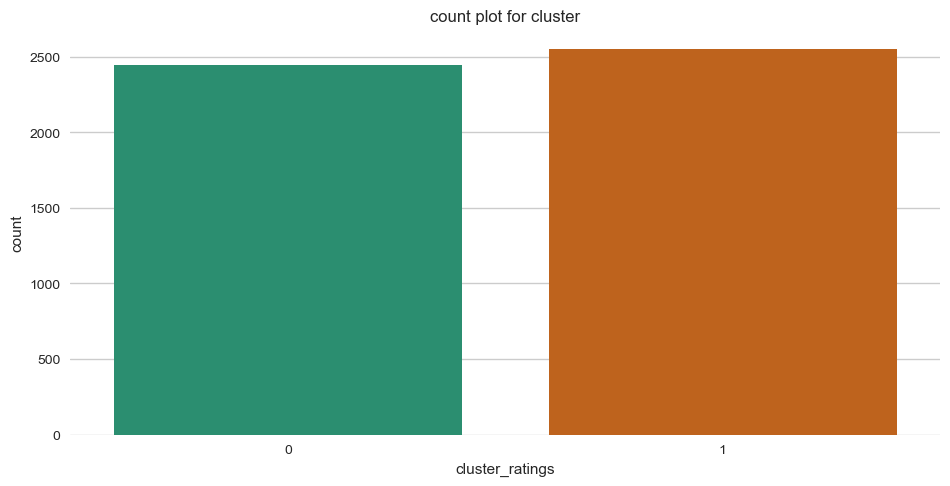

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(data=Wlb_df, x='cluster_ratings',palette = "Dark2")
plt.title("count plot for cluster")
plt.show()

In [53]:
cluster_group = Wlb_df.groupby('cluster_ratings')

In [54]:
cluster_group.get_group(0).head()

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,cluster_ratings
Employee_ID,,,,,,,,,,,,,,,,,,,,
EMP0004,27,1,6,2,20,1,32,8,4,0,2,1,1,3,2,3,1,2,2,0
EMP0005,49,1,5,0,32,1,35,12,2,0,3,1,0,3,2,3,2,0,3,0
EMP0007,31,3,5,4,24,2,51,7,3,1,0,1,0,5,0,3,0,2,1,0
EMP0009,56,3,0,3,9,0,24,4,2,0,3,1,0,2,2,4,0,2,2,0
EMP0010,30,0,2,4,28,0,57,6,1,1,2,1,0,2,0,1,2,2,3,0


### MODEL BUILDING

Logistic Regression, Decision Tree, Random Forest, Support Vector Machines, and Multilayered Perceptron

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [58]:
def Confusion_matrix(test, y_test, Clf):
    fig, ax = plt.subplots(figsize=(10, 8))
    prediction = Clf.predict(test)
    cm = confusion_matrix(y_test, prediction) # Calculate confusion matrix
    # Get unique class labels from y_test
    display_labels = y_test.unique()

    cm_display = ConfusionMatrixDisplay(cm, display_labels=display_labels)
    cm_display.plot(ax=ax, colorbar=True, cmap='magma')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    plt.show() #

In [59]:
X = Wlb_df_cleaned.drop(columns = 'Work_Life_Balance_Rating')
y = Wlb_df_cleaned['Work_Life_Balance_Rating']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 18), (1000, 18), (4000,), (1000,))

#### Logistic Regression

In [62]:
Lr = LogisticRegression()
parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = Lr,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

Accuracy: 0.186


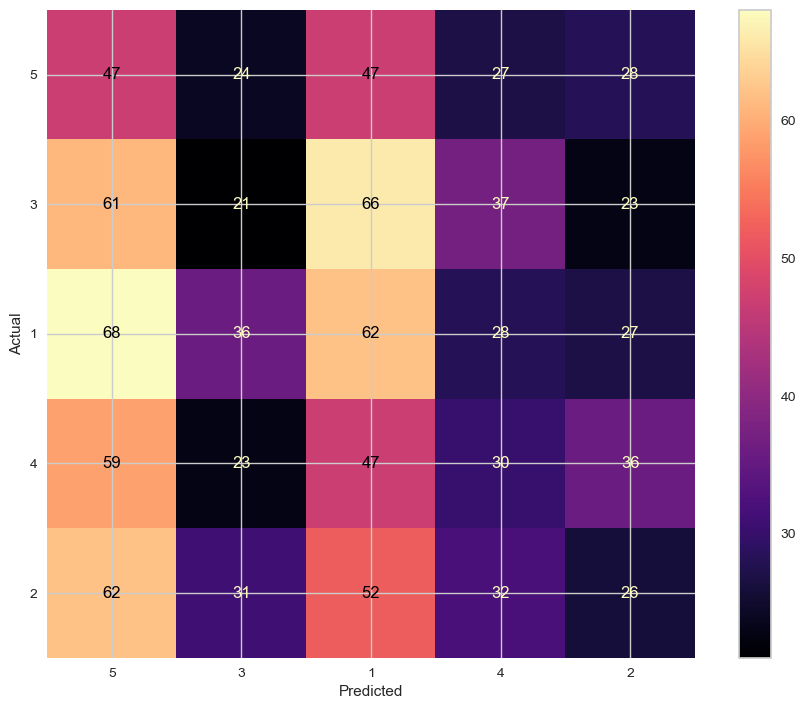

              precision    recall  f1-score   support

           1       0.16      0.27      0.20       173
           2       0.16      0.10      0.12       208
           3       0.23      0.28      0.25       221
           4       0.19      0.15      0.17       195
           5       0.19      0.13      0.15       203

    accuracy                           0.19      1000
   macro avg       0.18      0.19      0.18      1000
weighted avg       0.19      0.19      0.18      1000



In [64]:
Lr = LogisticRegression(C = 100)

Lr.fit(X_train, y_train)

Lr_pred = Lr.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, Lr_pred)}')
Confusion_matrix(X_test, y_test, Lr)
print(classification_report(y_test, Lr_pred))

### DECISION TREE

In [66]:
Dtc = DecisionTreeClassifier()
params = {'criterion' : ['gini', 'log_loss', 'entropy'],
                            'min_samples_split' : [2,4,6,8],
                            'max_depth' : [None, 2, 4, 6, 8]}
grid_search = GridSearchCV(estimator = Dtc,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'log_loss', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='accuracy')

Accuracy: 0.184


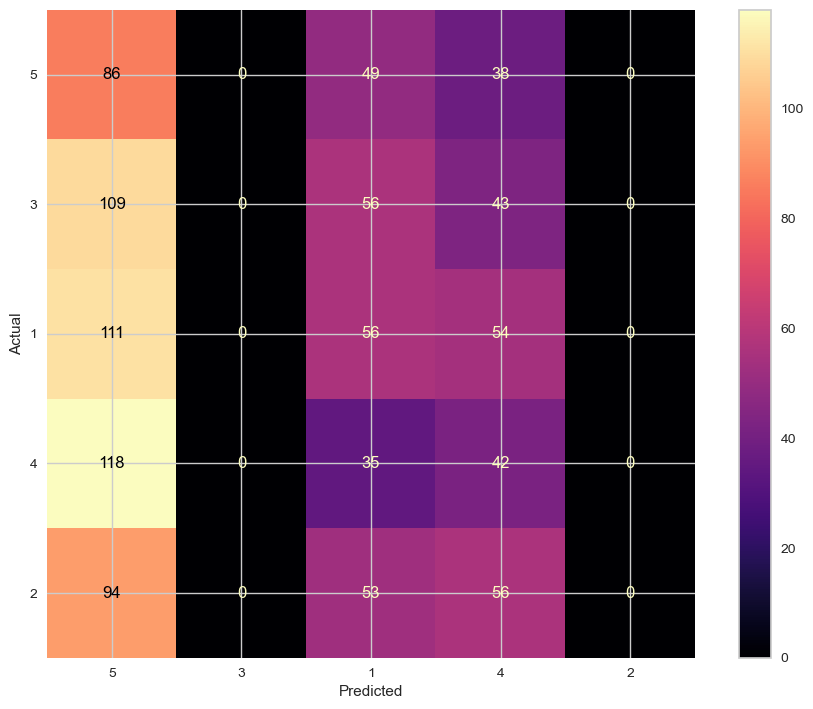

              precision    recall  f1-score   support

           1       0.17      0.50      0.25       173
           2       0.00      0.00      0.00       208
           3       0.22      0.25      0.24       221
           4       0.18      0.22      0.20       195
           5       0.00      0.00      0.00       203

    accuracy                           0.18      1000
   macro avg       0.11      0.19      0.14      1000
weighted avg       0.11      0.18      0.13      1000



In [67]:
Dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, min_samples_split = 2)

Dtc.fit(X_train, y_train)

Dtc_pred = Dtc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, Dtc_pred)}')
Confusion_matrix(X_test, y_test, Dtc)
print(classification_report(y_test, Dtc_pred))

### RANDOM FOREST

In [84]:
Rf = RandomForestClassifier()
params = {'min_samples_leaf' : [2, 4, 6,8],
                            'max_features' : ['auto', 0.95,0.85],
                            'max_depth' : [None, 2, 4]}

In [86]:
grid_search = GridSearchCV(estimator = Rf,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 2, 4],
                         'max_features': ['auto', 0.95, 0.85],
                         'min_samples_leaf': [2, 4, 6, 8]},
             scoring='accuracy')

Accuracy: 0.185


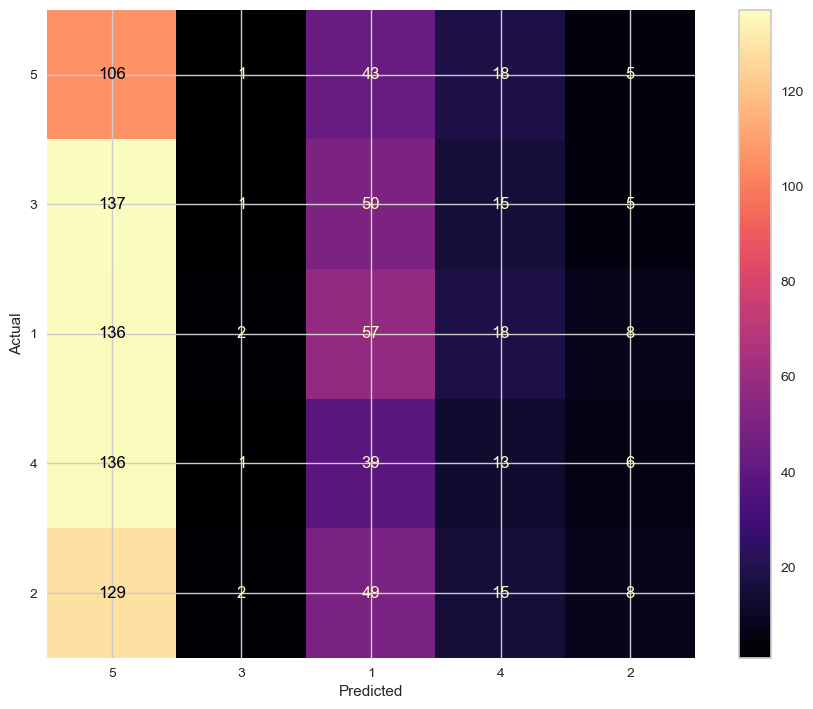

              precision    recall  f1-score   support

           1       0.16      0.61      0.26       173
           2       0.14      0.00      0.01       208
           3       0.24      0.26      0.25       221
           4       0.16      0.07      0.09       195
           5       0.25      0.04      0.07       203

    accuracy                           0.18      1000
   macro avg       0.19      0.20      0.14      1000
weighted avg       0.19      0.18      0.13      1000



In [87]:
Rf = RandomForestClassifier(max_depth=2, max_features=0.95, min_samples_leaf=7)

Rf.fit(X_train, y_train)

Rf_pred = Rf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, Rf_pred)}')
Confusion_matrix(X_test,y_test, Rf)
print(classification_report(y_test, Rf_pred))

### SUPPORT VECTOR MACHINES

In [89]:
svc = SVC()
params = {'C': [0.1, 1, 10],
          'gamma': [1, 0.1, 0.01]}

In [90]:
grid_search = GridSearchCV(estimator = svc,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
             scoring='accuracy')

Accuracy: 0.186


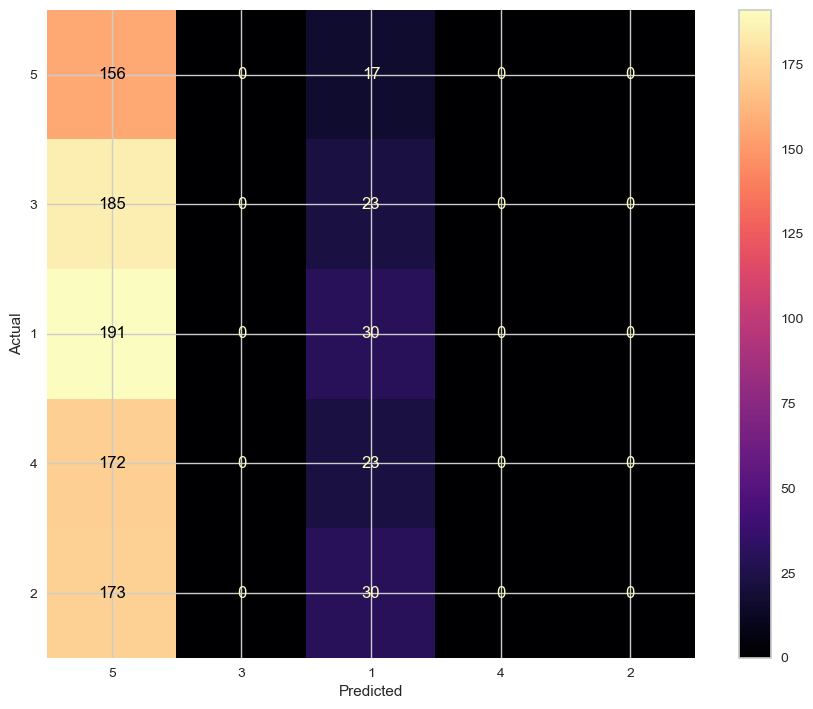

              precision    recall  f1-score   support

           1       0.18      0.90      0.30       173
           2       0.00      0.00      0.00       208
           3       0.24      0.14      0.17       221
           4       0.00      0.00      0.00       195
           5       0.00      0.00      0.00       203

    accuracy                           0.19      1000
   macro avg       0.08      0.21      0.09      1000
weighted avg       0.08      0.19      0.09      1000



In [91]:
svc = SVC(C = 0.1, gamma = 0.001)

svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, svc_pred)}')
Confusion_matrix(X_test, y_test, svc)
print(classification_report(y_test, svc_pred))

### MULTILAYERED PERCEPTRON

In [136]:
mlp = MLPClassifier()
params = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
          'activation': ['tanh', 'relu'],
          'solver': ['sgd', 'adam']}

In [137]:
grid_search = GridSearchCV(estimator = mlp,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

Accuracy: 0.213


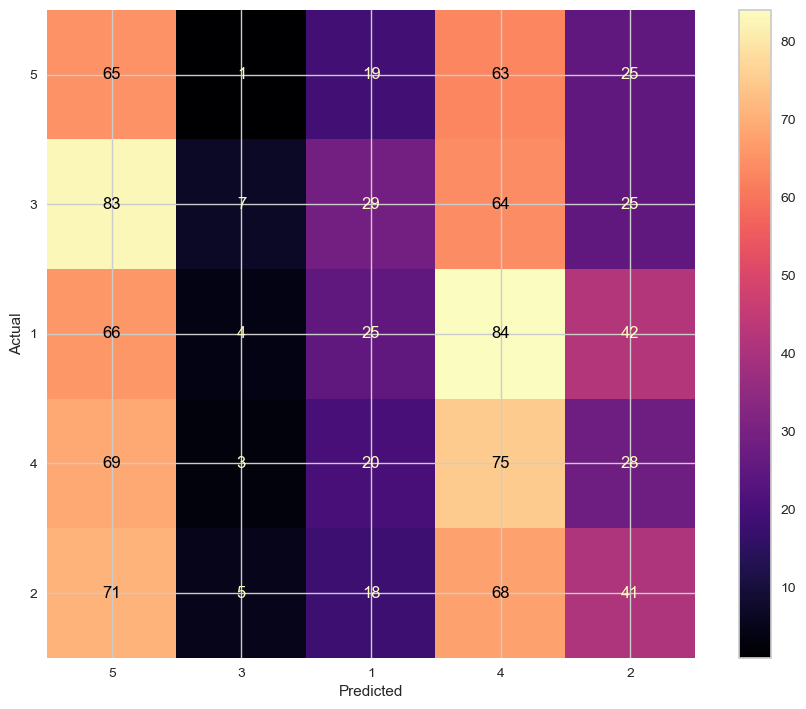

              precision    recall  f1-score   support

           1       0.18      0.38      0.25       173
           2       0.35      0.03      0.06       208
           3       0.23      0.11      0.15       221
           4       0.21      0.38      0.27       195
           5       0.25      0.20      0.23       203

    accuracy                           0.21      1000
   macro avg       0.25      0.22      0.19      1000
weighted avg       0.25      0.21      0.19      1000



In [140]:
mlp = MLPClassifier()

mlp.fit(X_train, y_train)

mlp_pred = mlp.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, mlp_pred)}')
Confusion_matrix(X_test, y_test, mlp)
print(classification_report(y_test, mlp_pred))

### Clustered data

In [142]:
X_c = Wlb_df.drop(columns = 'cluster_ratings')
y_c= Wlb_df['cluster_ratings']

In [143]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
X_train_c.shape, X_test_c.shape, y_train_c.shape, y_test_c.shape

((4000, 19), (1000, 19), (4000,), (1000,))

#### Logistic Regression

In [145]:
Lr = LogisticRegression()
parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = Lr,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train_c, y_train_c)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

Accuracy: 1.0


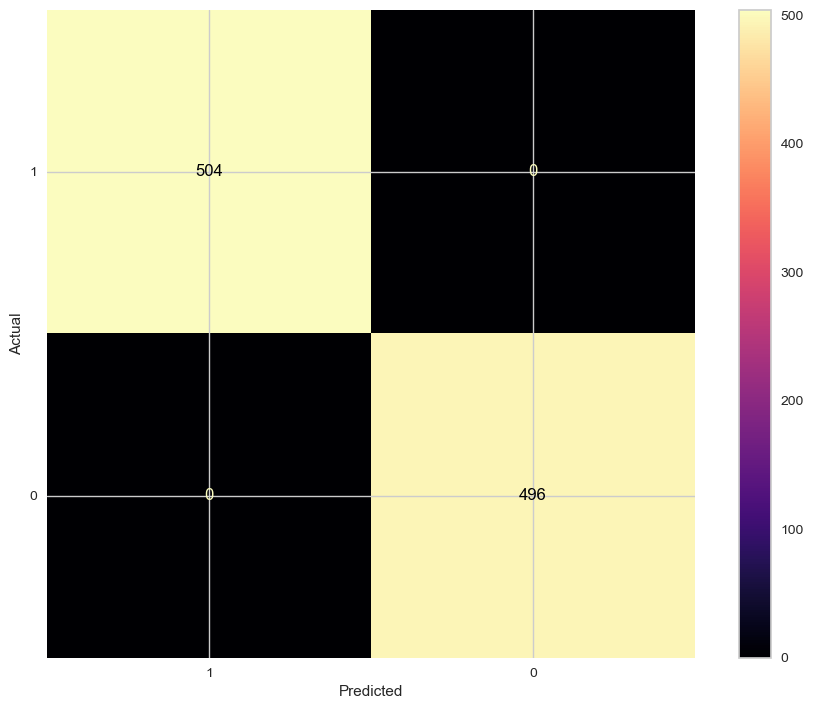

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00       496

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [147]:
Lr_c = LogisticRegression(C = 100)

Lr_c.fit(X_train_c, y_train_c)

Lr_c_pred = Lr_c.predict(X_test_c)

print(f'Accuracy: {accuracy_score(y_test_c, Lr_c_pred)}')
Confusion_matrix(X_test_c, y_test_c,Lr_c)
print(classification_report(y_test_c, Lr_c_pred))

### DECISION TREE

In [149]:
Dtc = DecisionTreeClassifier()
params = {'criterion' : ['gini', 'log_loss', 'entropy'],
                            'min_samples_split' : [2,4,6,8],
                            'max_depth' : [None, 2, 4, 6, 8]}
grid_search = GridSearchCV(estimator = Dtc,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train_c, y_train_c)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'log_loss', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='accuracy')

Accuracy: 1.0


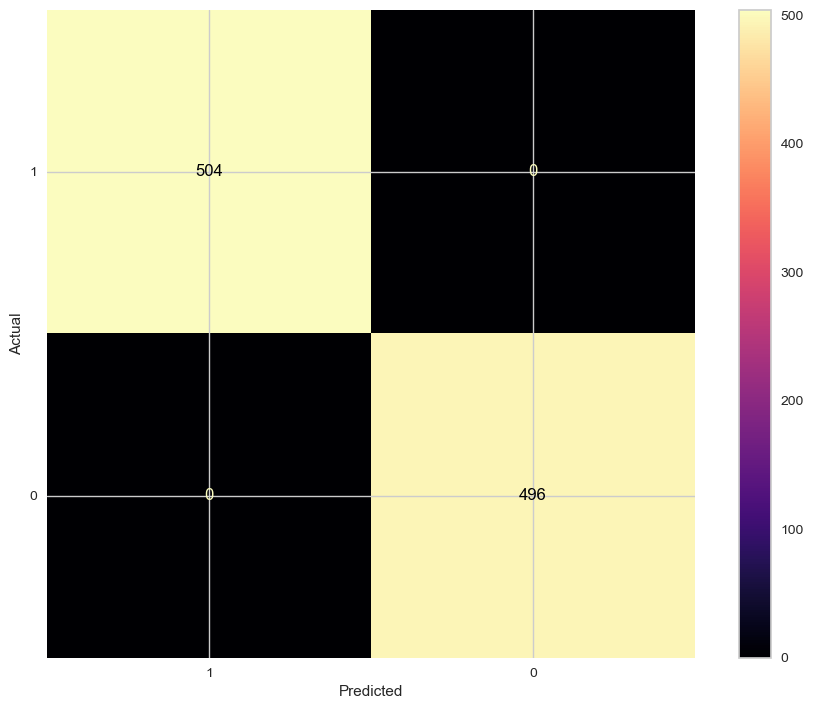

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00       496

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [150]:
Dtc = DecisionTreeClassifier()

Dtc.fit(X_train_c, y_train_c)

Dtc_pred = Dtc.predict(X_test_c)

print(f'Accuracy: {accuracy_score(y_test_c, Dtc_pred)}')
Confusion_matrix(X_test_c, y_test_c, Dtc)
print(classification_report(y_test_c, Dtc_pred))

### RANDOM FOREST

In [152]:
Rf = RandomForestClassifier()
params = {'min_samples_leaf' : [2,4,6,8],
                            'max_features' : ['auto', 0.90, 0.80],
                            'max_depth' : [None, 2, 4, 6, 8]}

In [153]:
grid_search = GridSearchCV(estimator = Rf,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train_c, y_train_c)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 2, 4, 6, 8],
                         'max_features': ['auto', 0.9, 0.8],
                         'min_samples_leaf': [2, 4, 6, 8]},
             scoring='accuracy')

Accuracy: 1.0


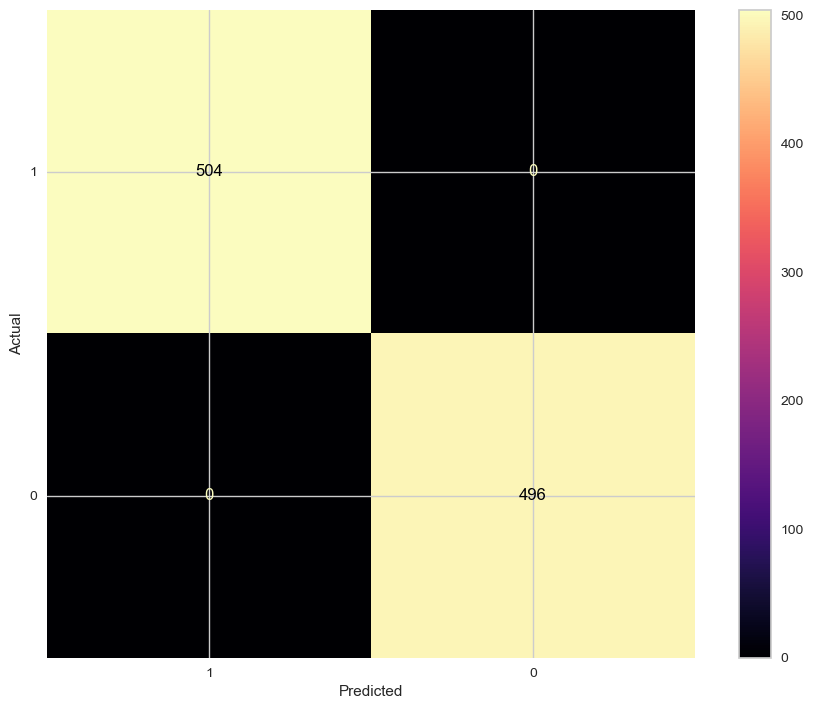

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00       496

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [154]:
Rf = RandomForestClassifier(max_depth=2, max_features=0.95, min_samples_leaf=7)

Rf.fit(X_train_c, y_train_c)

Rf_pred = Rf.predict(X_test_c)

print(f'Accuracy: {accuracy_score(y_test_c, Rf_pred)}')
Confusion_matrix(X_test_c, y_test_c, Rf)
print(classification_report(y_test_c, Rf_pred))

### SUPPORT VECTOR MACHINES

In [156]:
svc = SVC()
params = {'C': [0.01,0.1, 1, 10],
          'gamma': [1, 0.1, 0.01, 0.001]}

In [157]:
grid_search = GridSearchCV(estimator = svc,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train_c, y_train_c)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='accuracy')

Accuracy: 1.0


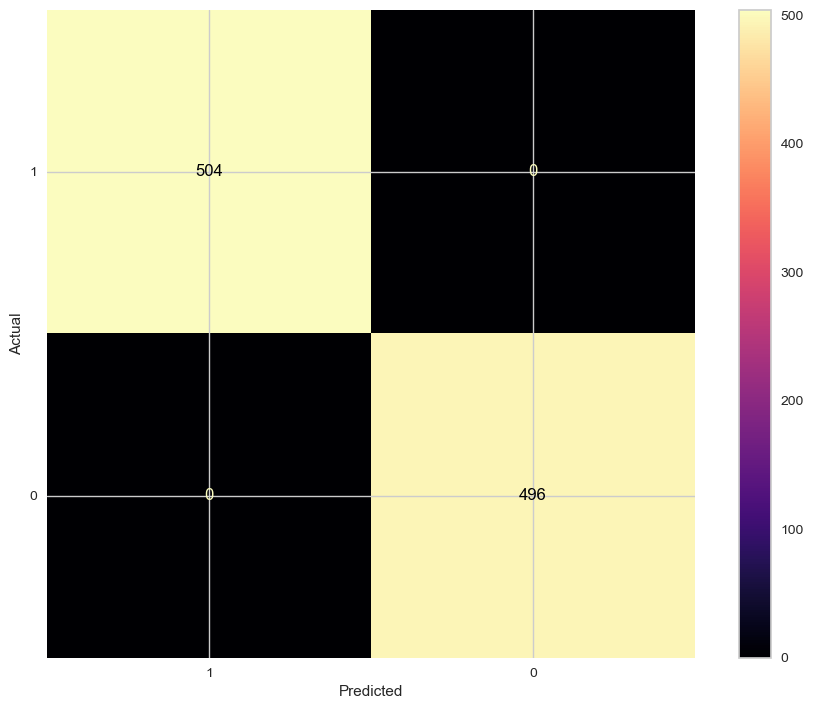

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00       496

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [158]:
svc = SVC(C = 10, gamma = 0.001)

svc.fit(X_train_c, y_train_c)

svc_pred = svc.predict(X_test_c)

print(f'Accuracy: {accuracy_score(y_test_c, svc_pred)}')
Confusion_matrix(X_test_c, y_test_c, svc)
print(classification_report(y_test_c, svc_pred))

### MULTILAYERED PERCEPTRON

In [160]:
mlp = MLPClassifier()
params = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
          'activation': ['tanh', 'relu'],
          'solver': ['sgd', 'adam']}

In [161]:
grid_search = GridSearchCV(estimator = mlp,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train_c, y_train_c)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

Accuracy: 1.0


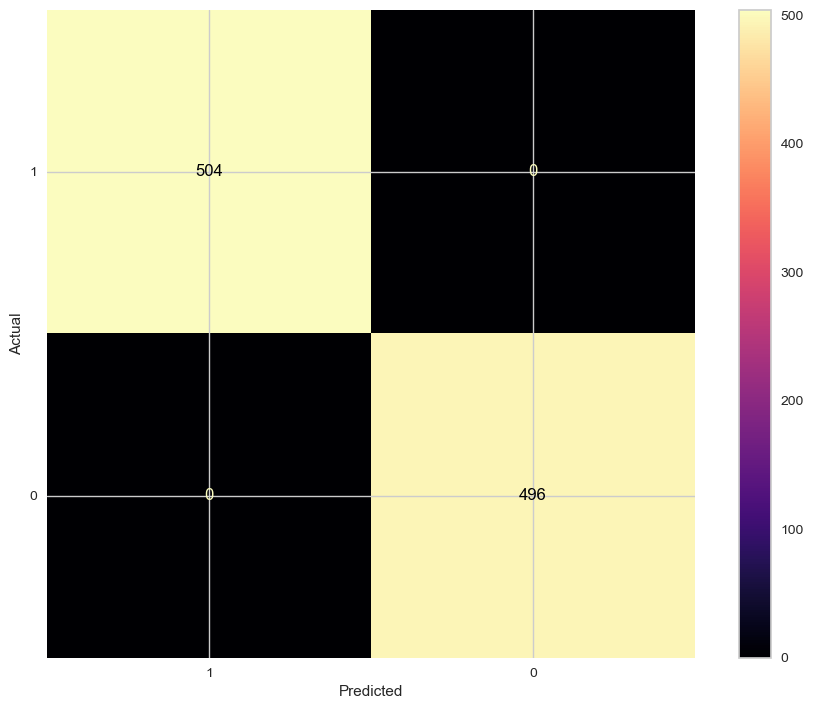

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00       496

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [162]:
mlp = MLPClassifier(activation = 'tanh', hidden_layer_sizes = (50,50,50), learning_rate = 'adaptive', solver = 'sgd')

mlp.fit(X_train_c, y_train_c)

mlp_pred = mlp.predict(X_test_c)

print(f'Accuracy: {accuracy_score(y_test_c, mlp_pred)}')
Confusion_matrix(X_test_c, y_test_c, mlp)
print(classification_report(y_test_c, mlp_pred))

## SECOND DATASET

In [164]:
Work_df = pd.read_csv('C:\\Users\\PC\\Desktop\\Gab\\Wellbeing_and_lifestyle_data_Kaggle.csv')
Work_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [165]:
Work_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [166]:
Work_df.describe()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2.922677,5.232970,5.508077,5.616454,6.474267,4.000751,2.715314,1.410656,5.745993,3.194778,5.703606,3.752129,7.042888,2.898886,2.930879,1.728963,5.711558,3.326572,6.233346,666.751503
std,1.442694,3.311912,2.840334,3.242021,3.086672,2.755837,1.851586,0.491968,2.624097,2.357518,2.891013,3.230987,1.199044,3.692180,2.676301,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


In [167]:
Work_df.describe(include='object')

,Timestamp,DAILY_STRESS,AGE,GENDER
count,15972,15972,15972,15972
unique,7002,7,4,2
top,7/23/18,3,21 to 35,Female
freq,162,4398,6108,9858


In [168]:
Work_df.isna().sum()

Timestamp                  0
FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

In [169]:
Work_df.duplicated().sum()

482

In [170]:
Work_df.drop_duplicates(inplace=True)
Work_df.duplicated().sum()


0

In [171]:
Work_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


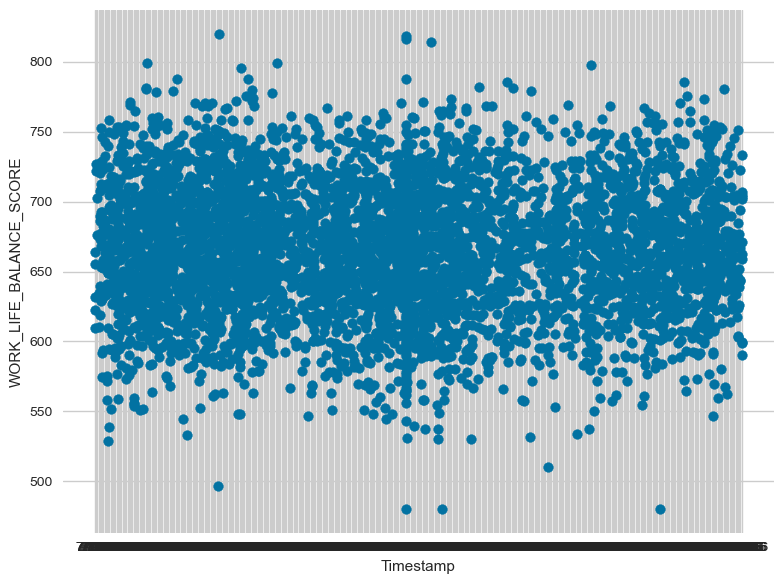

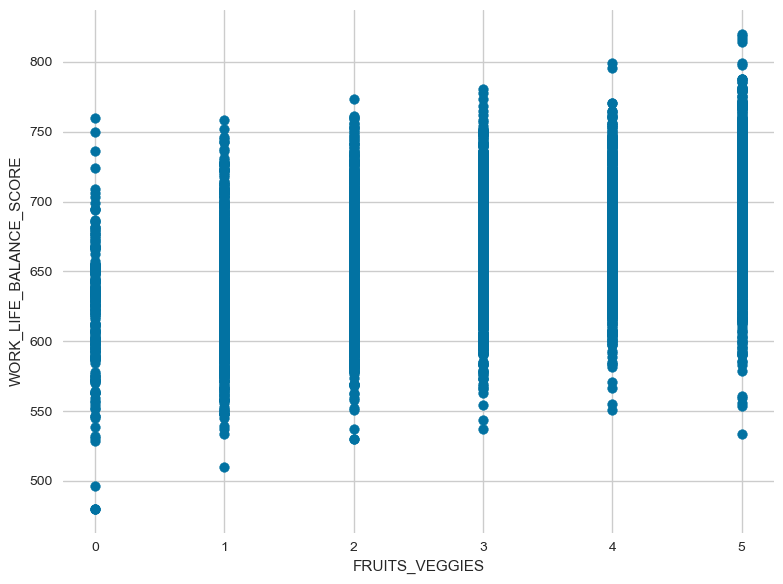

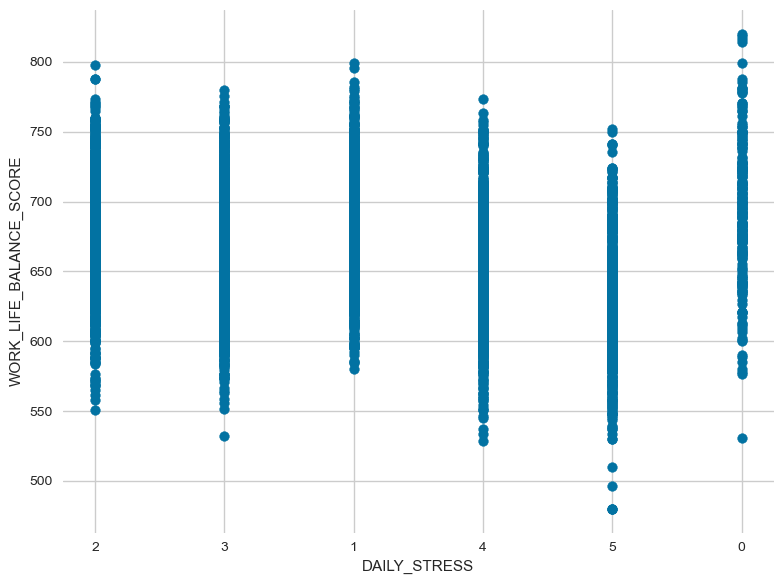

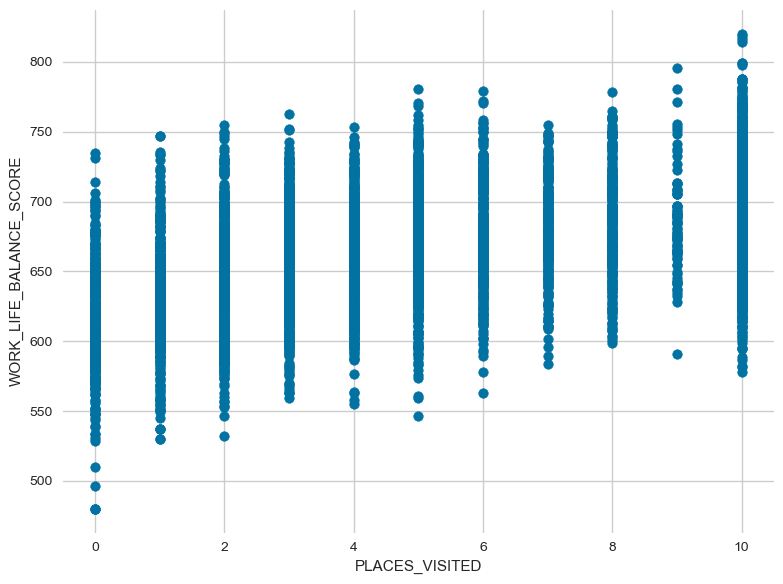

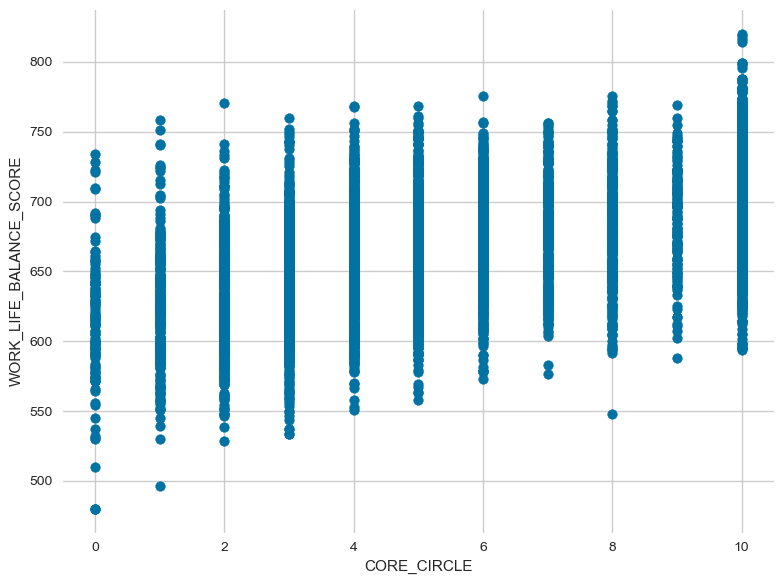

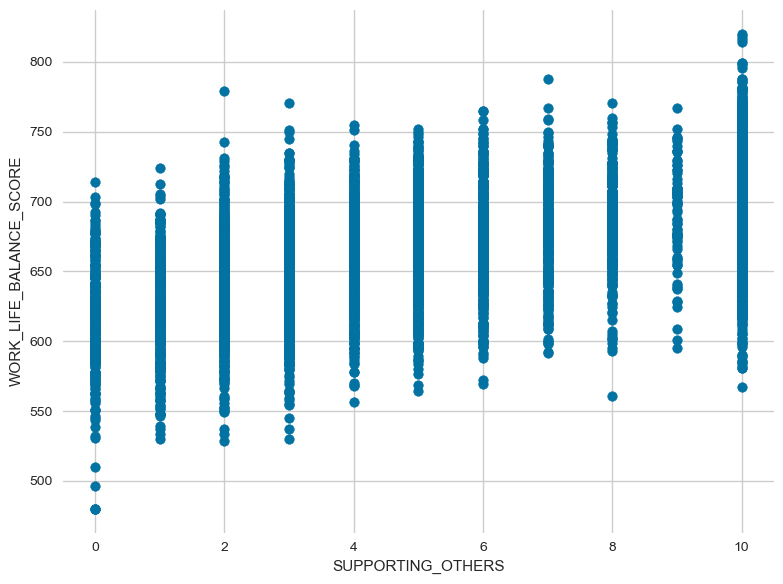

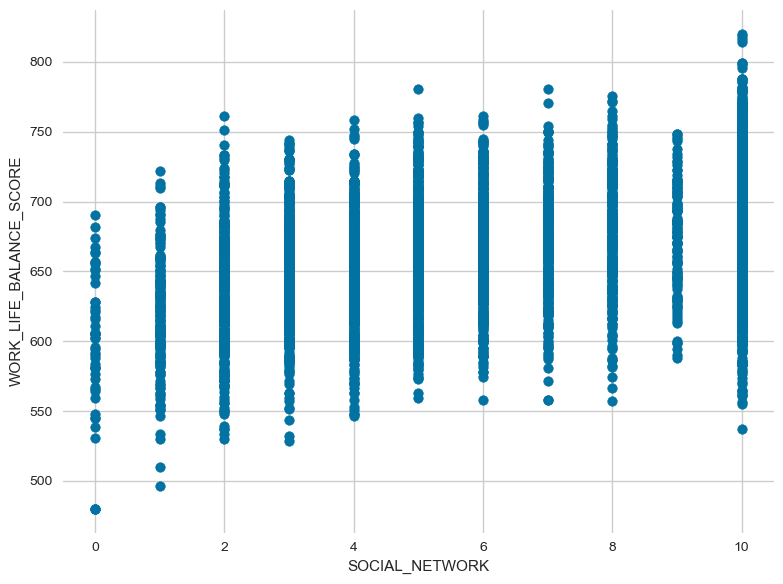

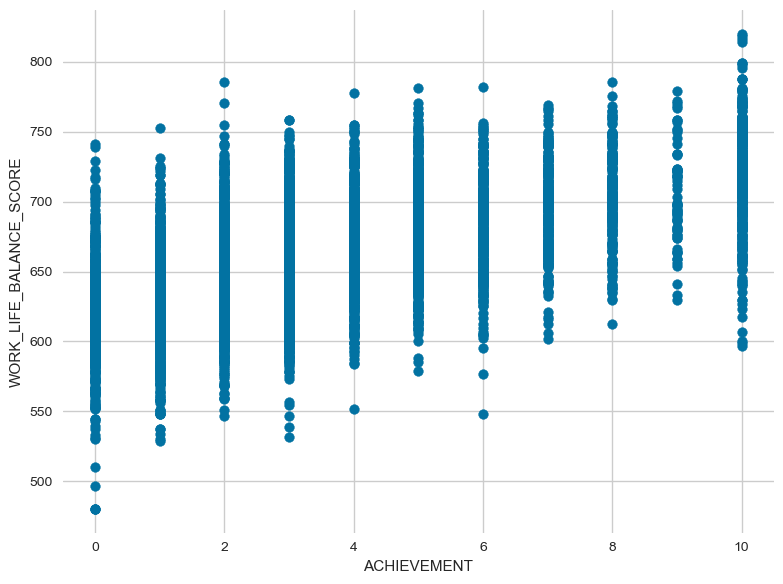

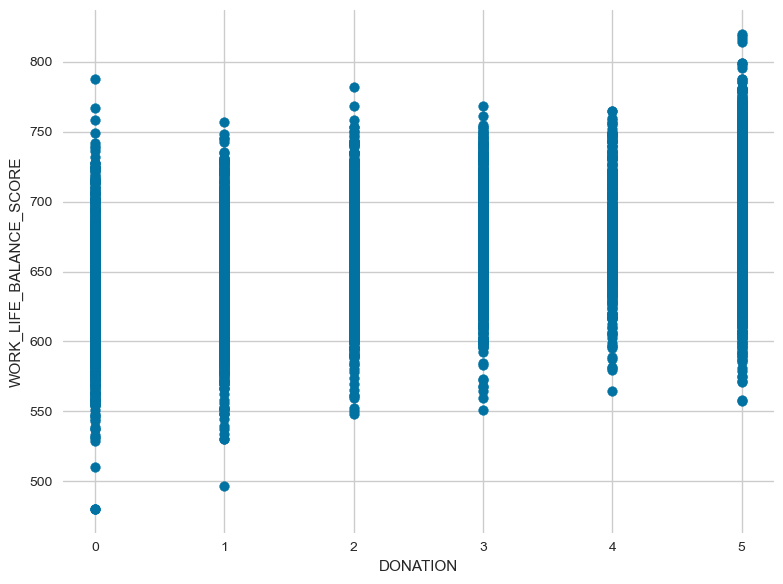

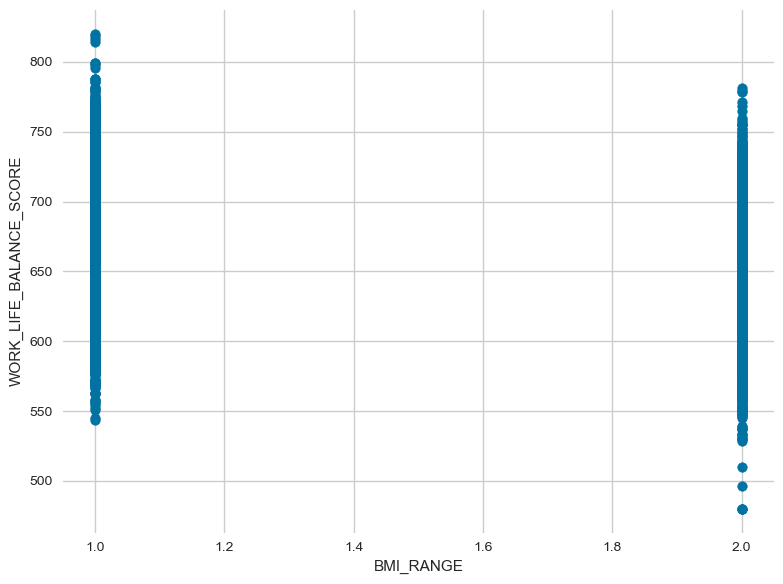

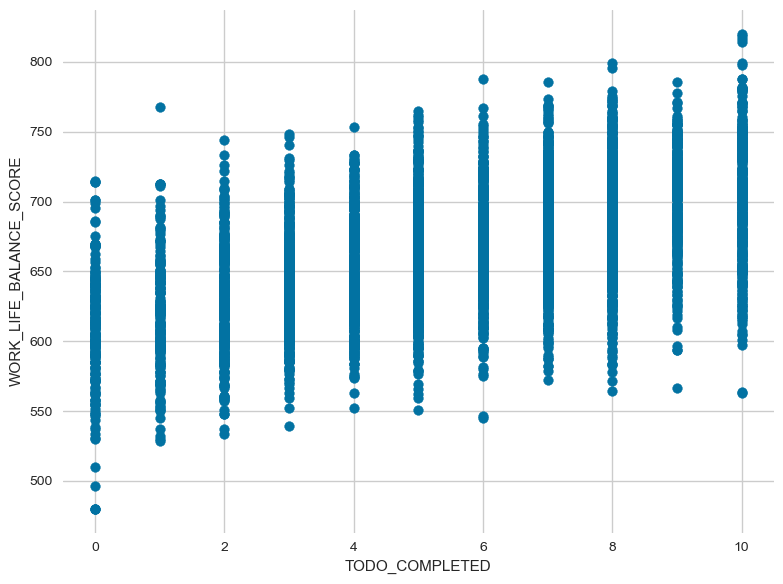

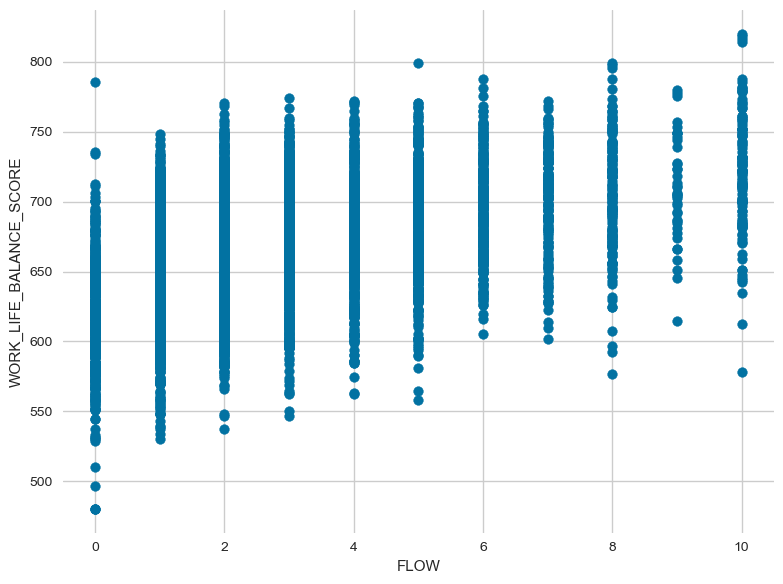

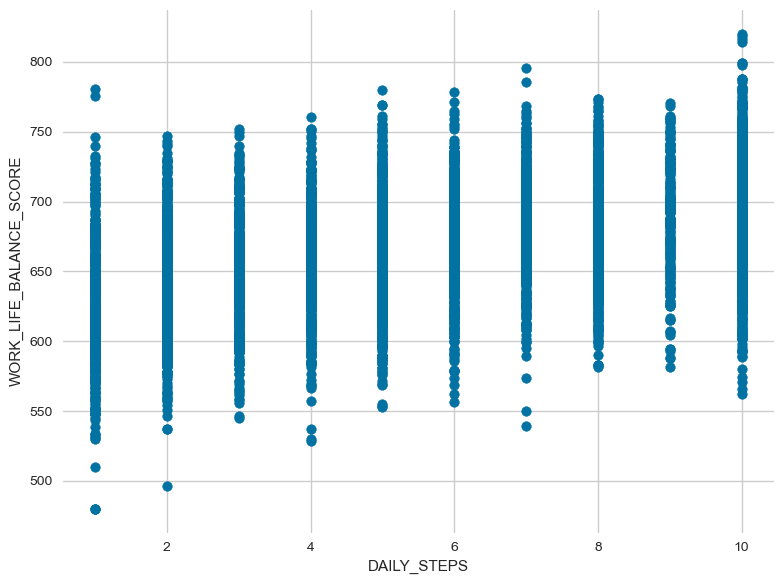

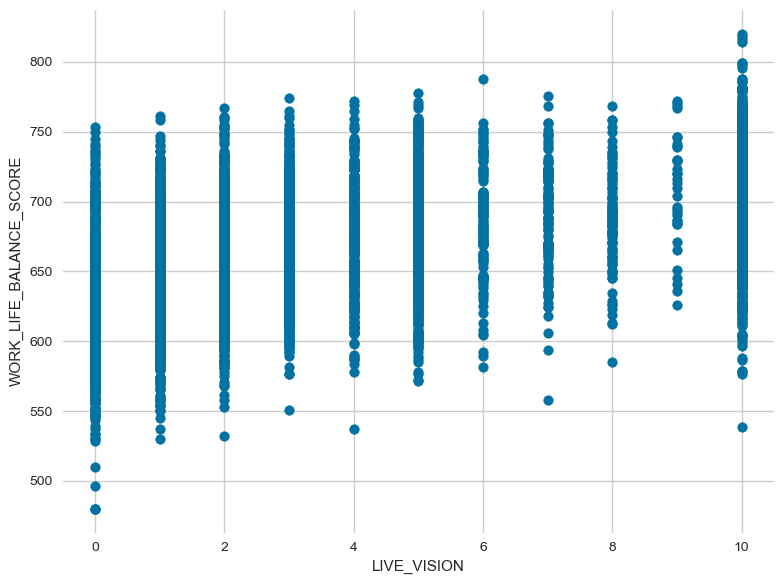

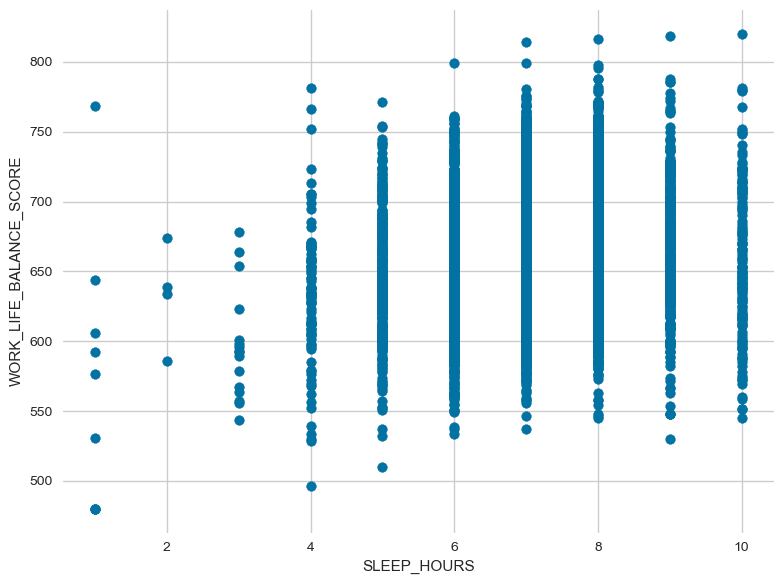

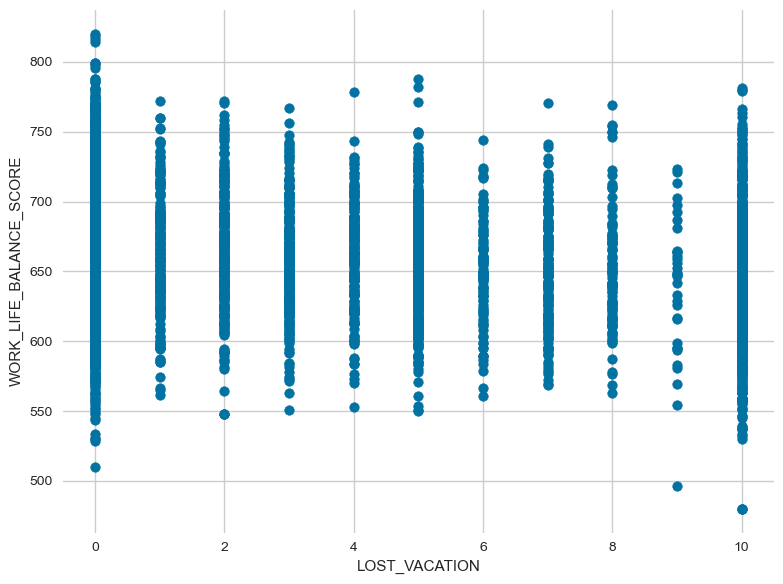

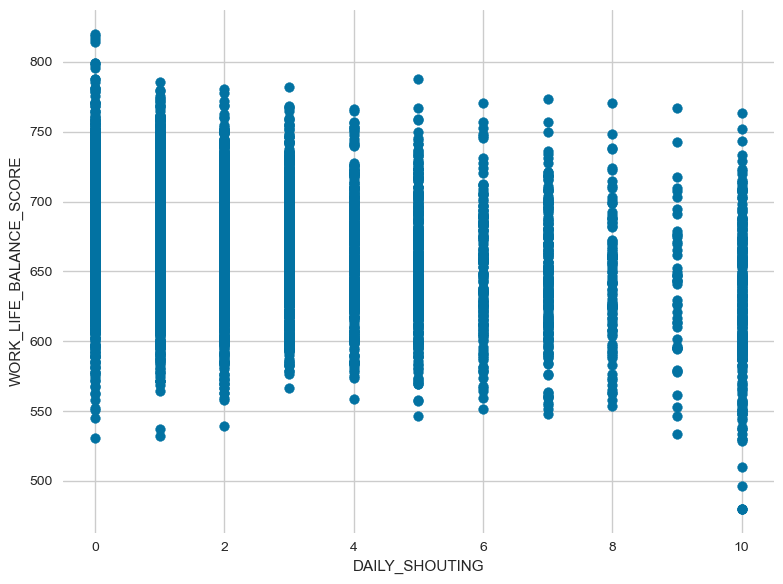

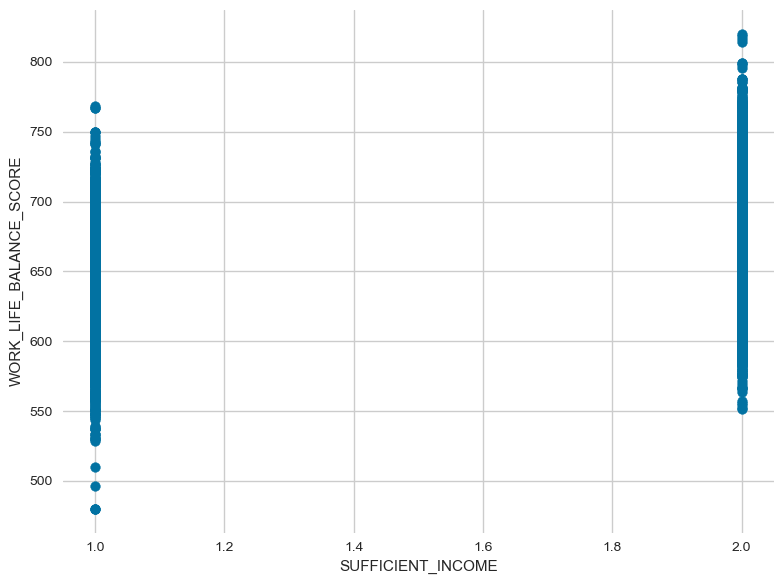

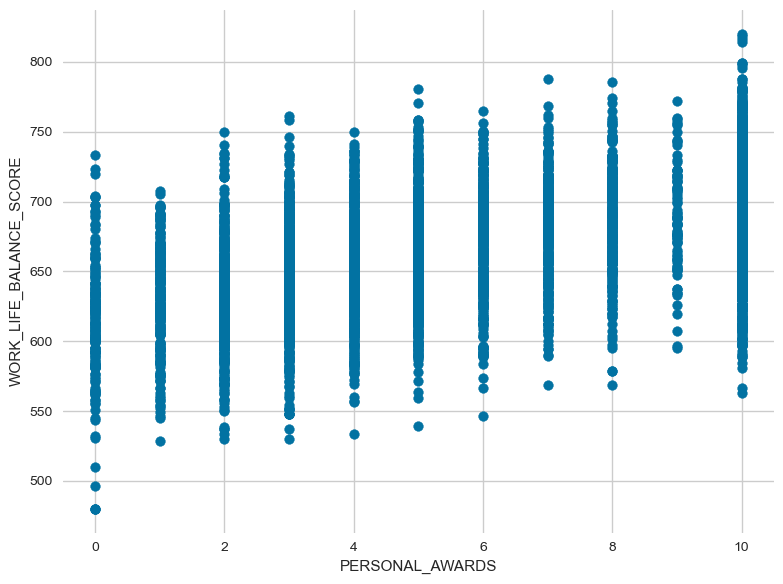

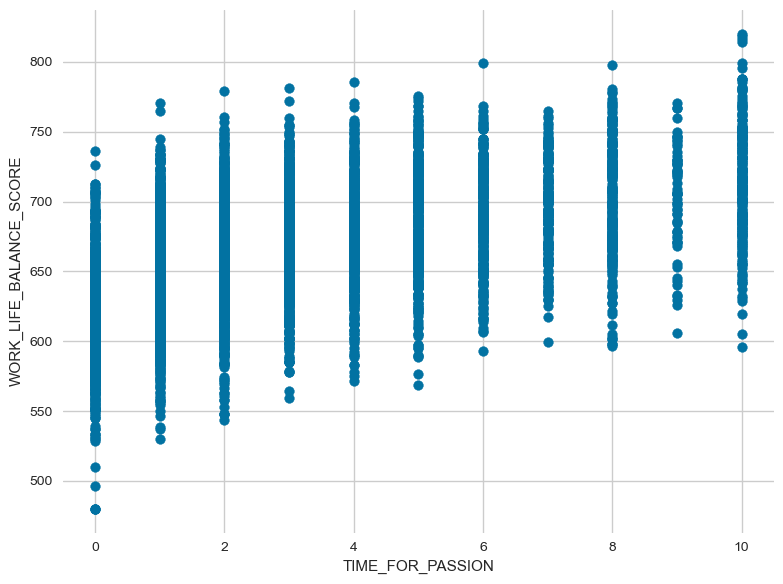

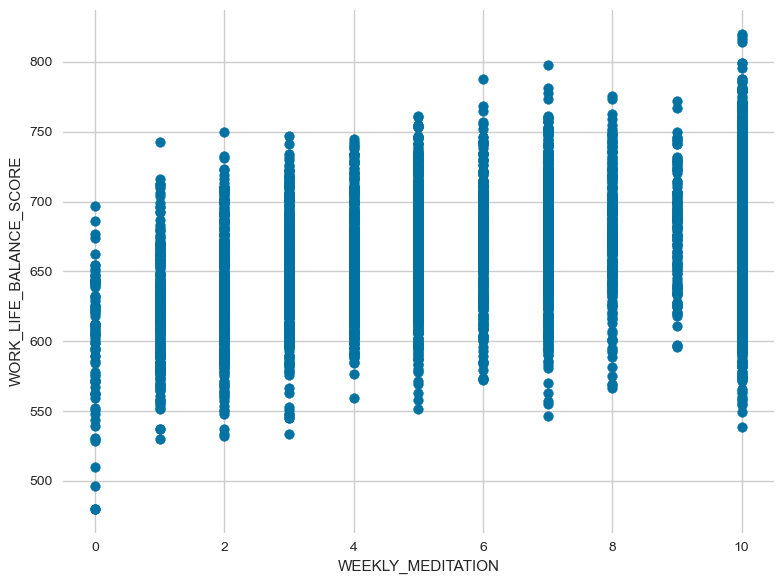

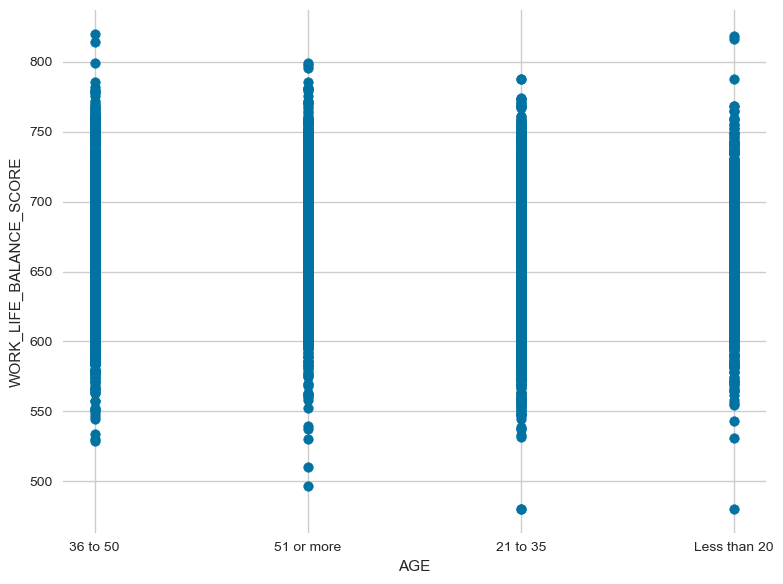

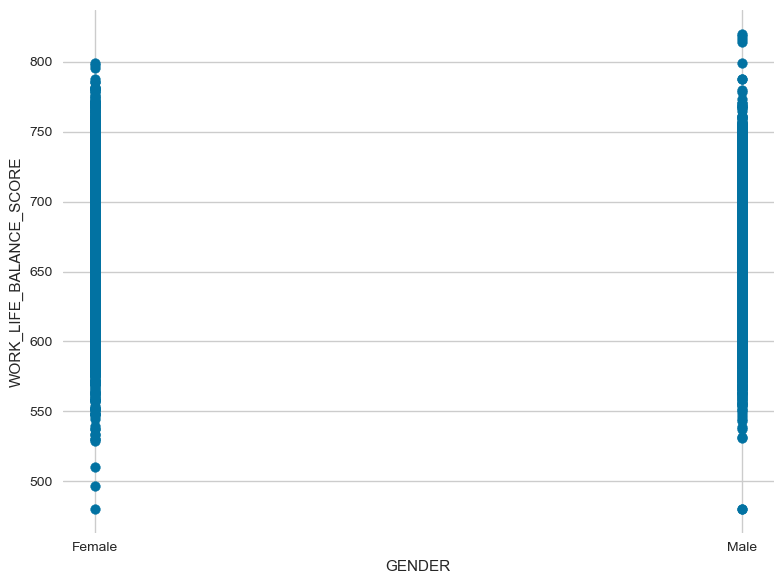

In [172]:
for i in Work_df.columns[:-1]:
    plt.figure(figsize = (8,6))
    plt.scatter(Work_df[i][:5001], Work_df.WORK_LIFE_BALANCE_SCORE[:5001], c = 'b')
    plt.xlabel(i)
    plt.ylabel('WORK_LIFE_BALANCE_SCORE')
    plt.tight_layout()
    plt.show()

In [173]:
Work_dfX = Work_df.copy(deep = True)

In [174]:
# Extracting categorical columns
categorical_columns = Work_df.select_dtypes(include=['object'])
col = categorical_columns.columns
col

Index(['Timestamp', 'DAILY_STRESS', 'AGE', 'GENDER'], dtype='object')

In [175]:
le = LabelEncoder()
col_list = col.tolist()
# Apply LabelEncoder to each column in the list
for column in col_list:
    Work_df[column] = le.fit_transform(Work_df[column])
Work_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,5607,3,3,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,1,0,609.5
1,5607,2,4,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,1,0,655.6
2,5607,2,4,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,1,0,631.6
3,5607,3,4,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,2,0,622.7
4,5607,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,2,0,663.9


Text(0.5, 1.0, 'Correlation')

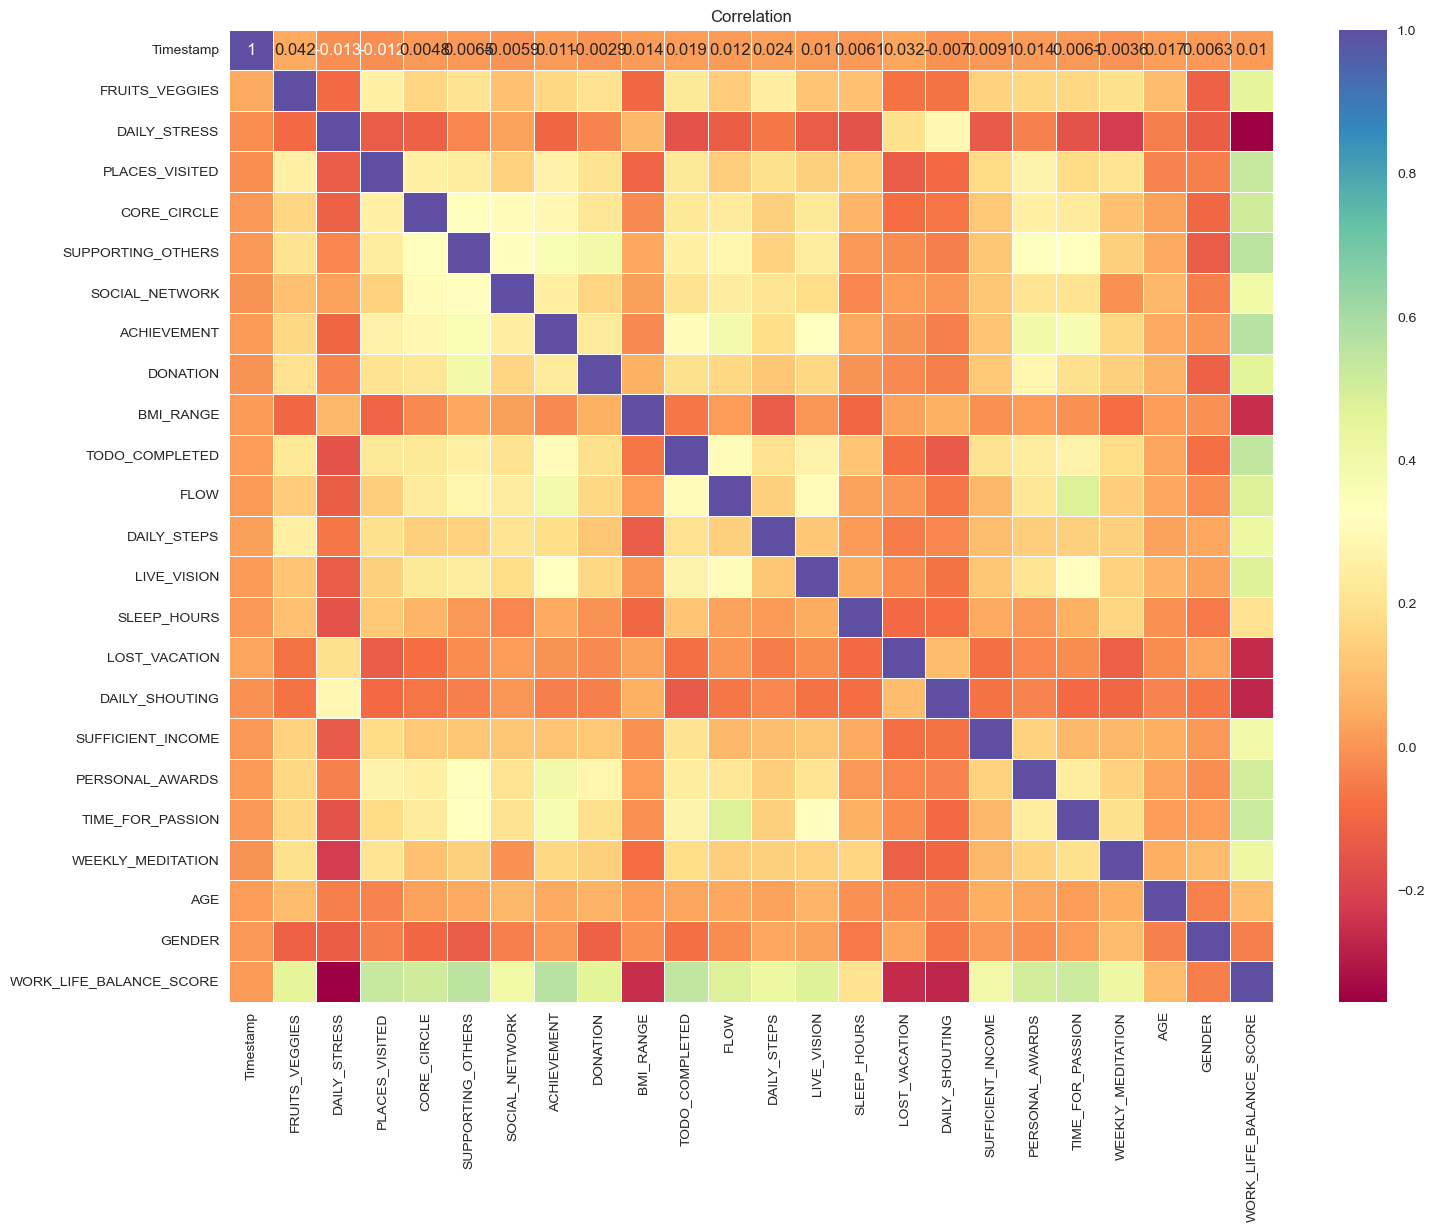

In [176]:
corr=Work_df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, annot=True, cmap='Spectral', linewidths=0.5)
r.set_title("Correlation")

In [177]:
cor_target = abs(corr['WORK_LIFE_BALANCE_SCORE'])    #Absolute correlation values
relevant_features = cor_target[cor_target>0.03]   #Mid correlated

#Getting correlated features
# Corr_features = [index for index, value in relevant_features.iteritems()]
Corr_features = [index for index, value in relevant_features.items()] # Changed iteritems() to items()
#Removing target
Corr_features.remove('WORK_LIFE_BALANCE_SCORE')
print(Corr_features)
len(Corr_features)

['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER']


22

In [178]:
# Creating new dataframe with features highly correlated with target variable with the target variable included

Edited_df = Work_df[['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS',
                    'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
                    'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS',
                    'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER','WORK_LIFE_BALANCE_SCORE']].copy()
Edited_df.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,3,2,5,0,5,2,0,1,6,...,7,5,5,1,4,0,5,1,0,609.5
1,2,4,4,3,8,10,5,2,2,5,...,8,2,2,2,3,2,6,1,0,655.6
2,2,4,3,4,4,10,3,2,2,2,...,8,10,2,2,4,8,3,1,0,631.6
3,3,4,10,3,10,7,2,5,2,3,...,5,7,5,1,5,2,0,2,0,622.7
4,5,1,3,3,10,4,2,4,2,5,...,7,0,0,2,8,1,5,2,0,663.9


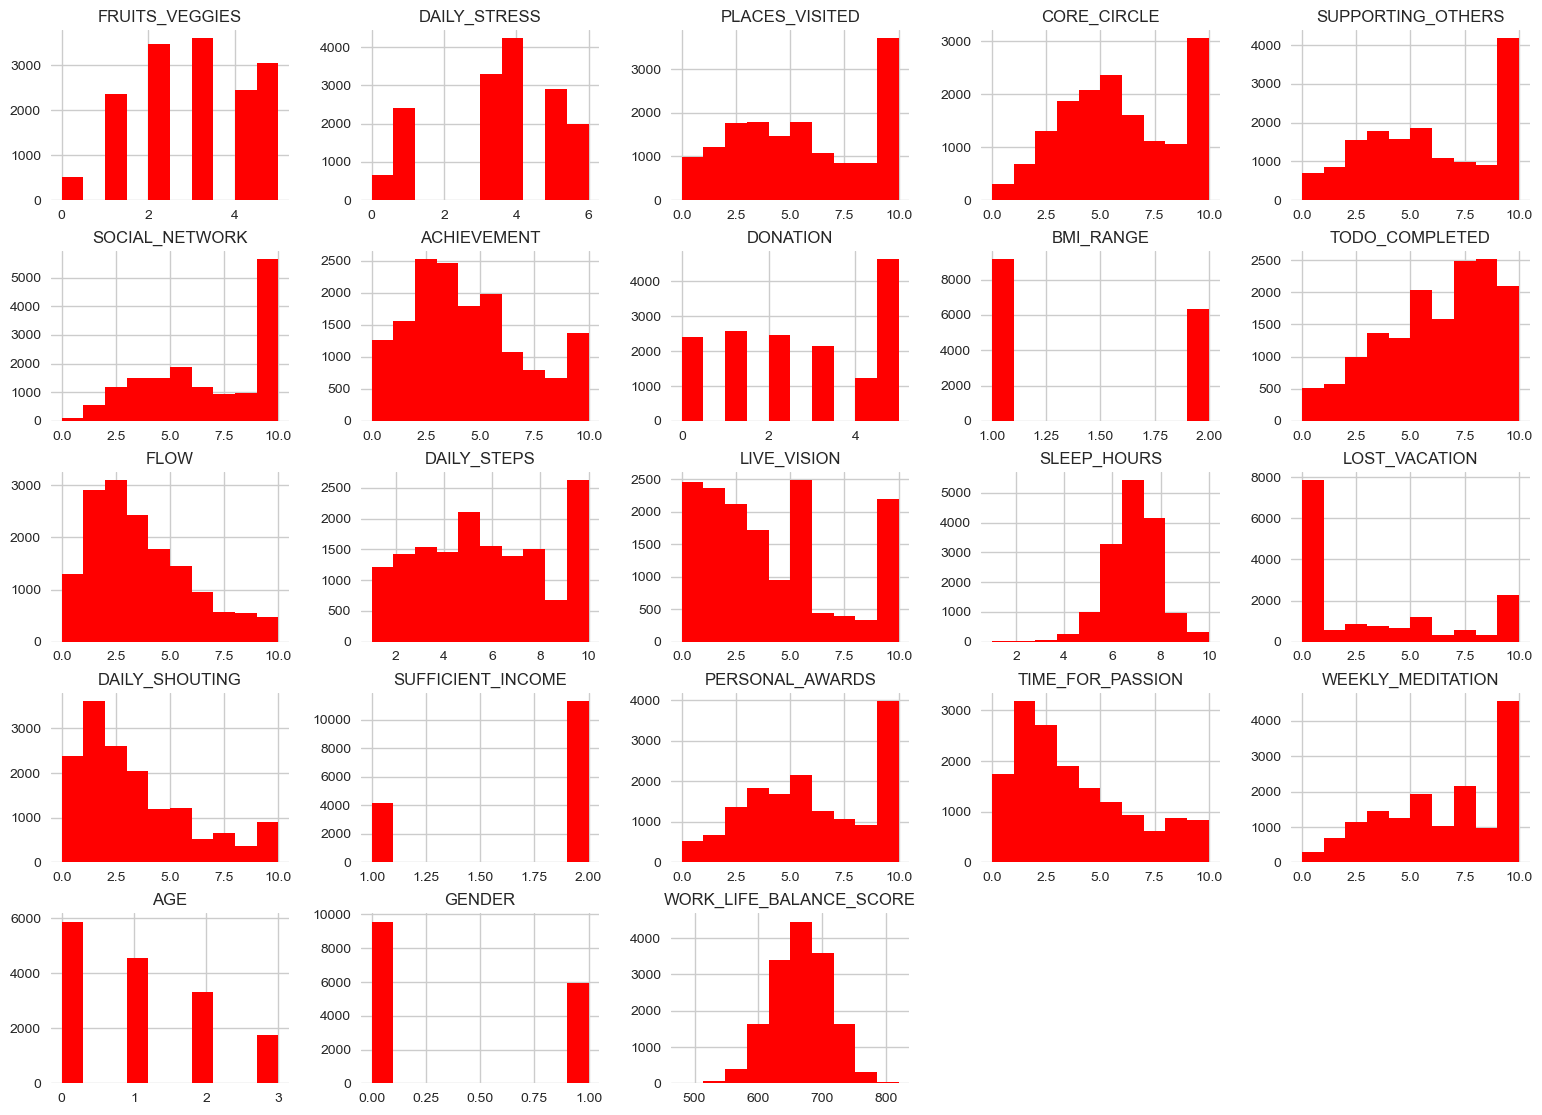

In [179]:
# Histogram plot of all columns
Edited_df.hist(figsize=(17, 13), color = 'red')
plt.show()

In [180]:
sample = Edited_df.sample(frac = 0.4)
sample.reset_index(drop = True, inplace = True)
sample.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,0,4,0,5,5,8,1,2,2,2,...,8,0,3,2,4,2,4,1,0,612.5
1,3,6,10,7,10,10,5,5,2,4,...,7,0,2,2,8,4,10,0,0,711.7
2,3,5,0,6,0,5,2,0,2,0,...,6,10,9,2,0,3,10,0,0,571.1
3,4,1,1,2,1,5,2,0,2,3,...,7,0,0,2,6,2,10,2,1,640.5
4,5,6,2,5,7,7,2,2,2,1,...,5,0,1,2,2,5,10,2,0,641.4


### Model Building

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [183]:
X = sample.drop(columns = 'WORK_LIFE_BALANCE_SCORE')
y = sample['WORK_LIFE_BALANCE_SCORE']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4956, 22), (1240, 22), (4956,), (1240,))

### LINEAR REGRESSION

In [186]:
Lr = LinearRegression()
parameters = [{'fit_intercept':[True, False]}]

grid_search = GridSearchCV(estimator = Lr,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid=[{'fit_intercept': [True, False]}], scoring='r2')

In [187]:
Lr = LinearRegression(fit_intercept = True)

Lr.fit(X_train, y_train)

Lr_pred = Lr.predict(X_test)

print(f'Training score: {Lr.score(X_train, y_train)}')
print(f'MSE: {mean_squared_error(y_test, Lr_pred)}')
print(f'MAE: {mean_absolute_error(y_test, Lr_pred)}')
print(f'R2: {r2_score(y_test, Lr_pred)}')

Training score: 0.9997246752268653
MSE: 0.5706890361486692
MAE: 0.6692842524776474
R2: 0.9997010252954304


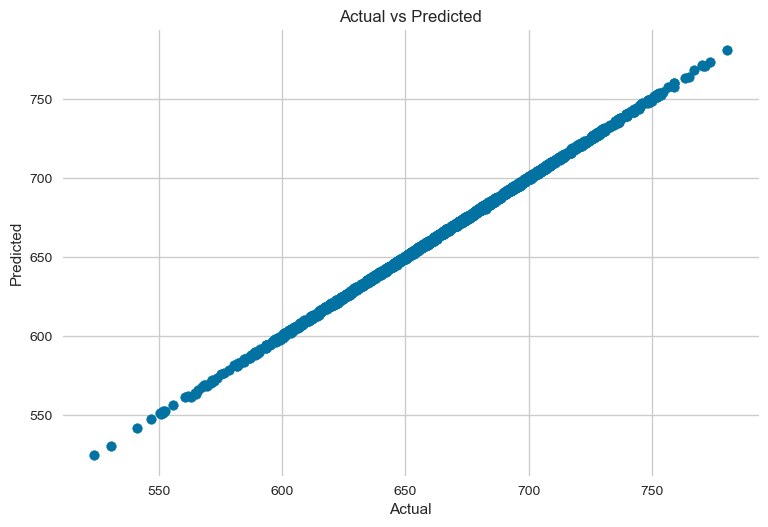

In [188]:
plt.scatter(y_test, Lr_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

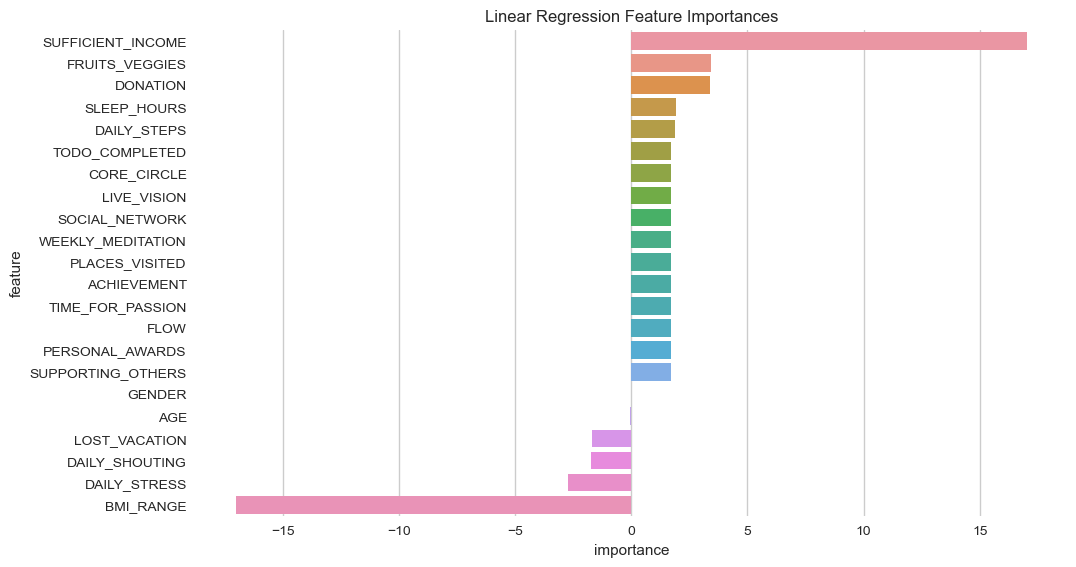

In [189]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': Lr.coef_
})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Linear Regression Feature Importances')
plt.show()

### DECISION TREE

In [191]:
Dtr = DecisionTreeRegressor()
params = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                            'min_samples_split' : [2,4,6],
                            'max_depth' : [None,2,4,6]}

grid_search = GridSearchCV(estimator = Dtr,
                           param_grid = params,
                           scoring = 'r2',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 2, 4, 6],
                         'min_samples_split': [2, 4, 6]},
             scoring='r2')

In [192]:
Dtr = DecisionTreeRegressor(criterion='poisson', min_samples_split=6)

Dtr.fit(X_train, y_train)

D_pred = Dtr.predict(X_test)

print(f'Training score: {Dtr.score(X_train, y_train)}')
print(f'MSE: {mean_squared_error(y_test, D_pred)}')
print(f'MAE: {mean_absolute_error(y_test, D_pred)}')
print(f'R2: {r2_score(y_test, D_pred)}')

Training score: 0.9800047898832738
MSE: 652.5732131205197
MAE: 19.95590188172043
R2: 0.6581275068478762


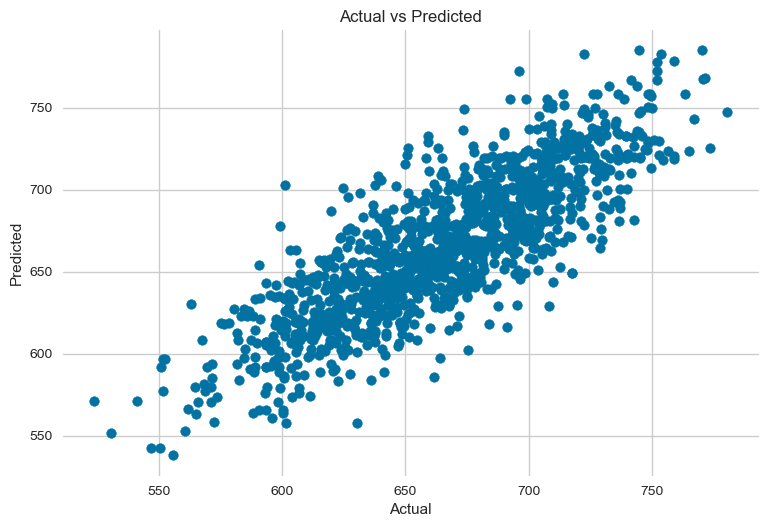

In [193]:
plt.scatter(y_test, D_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

#### RANDOM FOREST

In [195]:
Rfr = RandomForestRegressor()

params = {'min_samples_leaf' : [2,4,6, 8],
          'max_features' : ['auto', 0.95, 0.85, 0.75],
          'max_depth' : [None, 2, 4, 6]}

grid_search = GridSearchCV(estimator = Rfr,
                           param_grid = params,
                           scoring = 'r2',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2, 4, 6],
                         'max_features': ['auto', 0.95, 0.85, 0.75],
                         'min_samples_leaf': [2, 4, 6, 8]},
             scoring='r2')

In [196]:
Rfr = RandomForestRegressor(max_features=0.95, min_samples_leaf=2)

Rfr.fit(X_train, y_train)

R_pred = Rfr.predict(X_test)

print(f'Training score: {Rfr.score(X_train, y_train)}')
print(f'MSE: {mean_squared_error(y_test, R_pred)}')
print(f'MAE: {mean_absolute_error(y_test, R_pred)}')
print(f'R2: {r2_score(y_test, R_pred)}')

Training score: 0.9849486107108861
MSE: 161.31671679664714
MAE: 10.069877801810641
R2: 0.9154887956637602


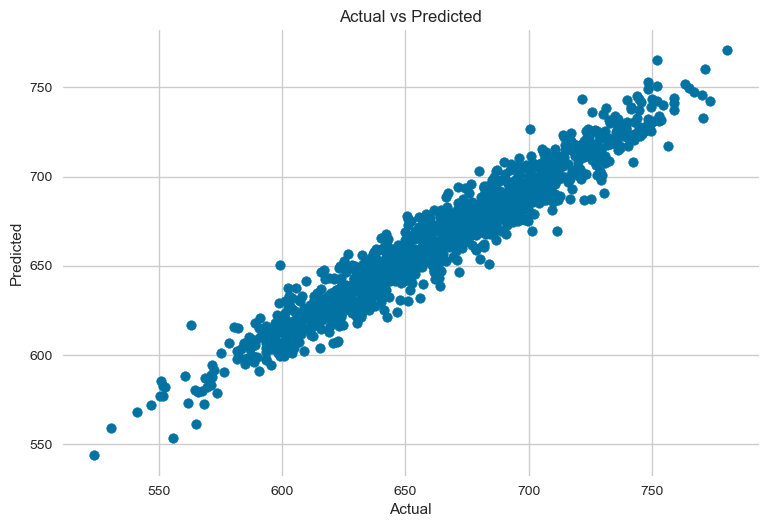

In [197]:
plt.scatter(y_test, R_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

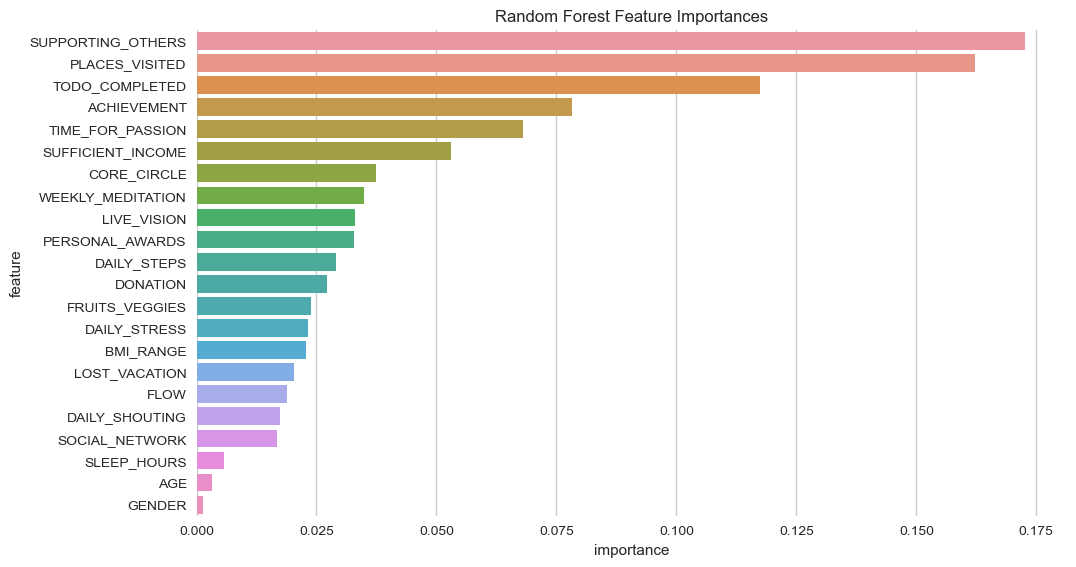

In [198]:
# Get feature importances
importances = Rfr.feature_importances_
feature_names = X_test.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Random Forest Feature Importances')
plt.show()


#### SUPPORT VECTOR MACHINE

In [200]:
# svr = SVR()

# params = {
#     'C': [0.1, 1, 10],
#     'gamma': ['scale', 'auto']
# }

# grid_search = GridSearchCV(estimator = svr,
#                            param_grid = params,
#                            scoring = 'r2',
#                            cv = 5,
#                            verbose=0)


# grid_search.fit(X_train, y_train)

Training score: 0.9997149687808641
MSE: 0.5902872849488593
MAE: 0.6614789513665477
R2: 0.9996907580916224


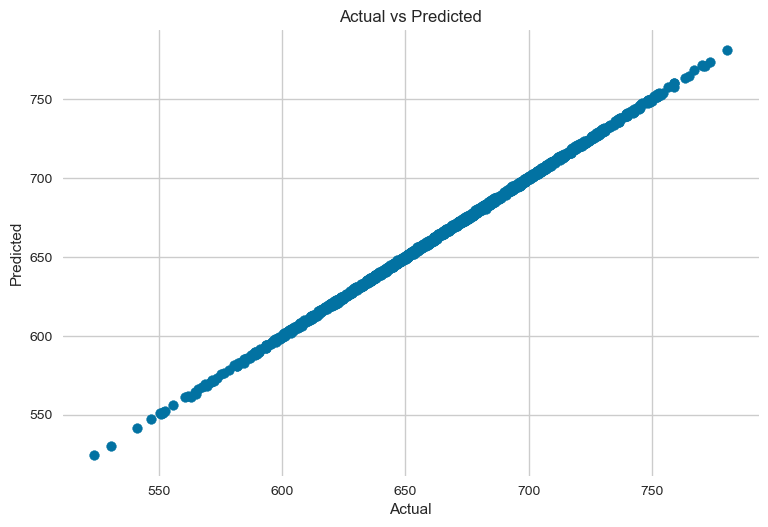

In [201]:
svr = SVR(C=10, gamma='scale', kernel='linear')

svr.fit(X_train, y_train)

svr_pred = svr.predict(X_test)

print(f'Training score: {svr.score(X_train, y_train)}')
print(f'MSE: {mean_squared_error(y_test, svr_pred)}')
print(f'MAE: {mean_absolute_error(y_test, svr_pred)}')
print(f'R2: {r2_score(y_test, svr_pred)}')

plt.scatter(y_test, svr_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Compute permutation importance
results = permutation_importance(svr, X_test, y_test, n_repeats=5, random_state=42)

for i, importance in enumerate(results.importances_mean):
    print(f"Feature {i+1}: {importance}")

Feature 1: 0.02487448066486091
Feature 2: 0.021616583622276163
Feature 3: 0.03572804495130348
Feature 4: 0.024597583783678045
Feature 5: 0.0317483991775495
Feature 6: 0.028277138032833292
Feature 7: 0.022132269840172712
Feature 8: 0.04117933891633792
Feature 9: 0.07400004647312841
Feature 10: 0.020922650688854884
Feature 11: 0.016361670396673265
Feature 12: 0.03025277304429024
Feature 13: 0.03269465033686434
Feature 14: 0.005366912401802248
Feature 15: 0.04108145420266716
Feature 16: 0.023631609175018407
Feature 17: 0.060436144963400926
Feature 18: 0.02892031182420791
Feature 19: 0.020741522362667974
Feature 20: 0.027429584866224044
Feature 21: 4.538828698330555e-06
Feature 22: 1.721313224622989e-07


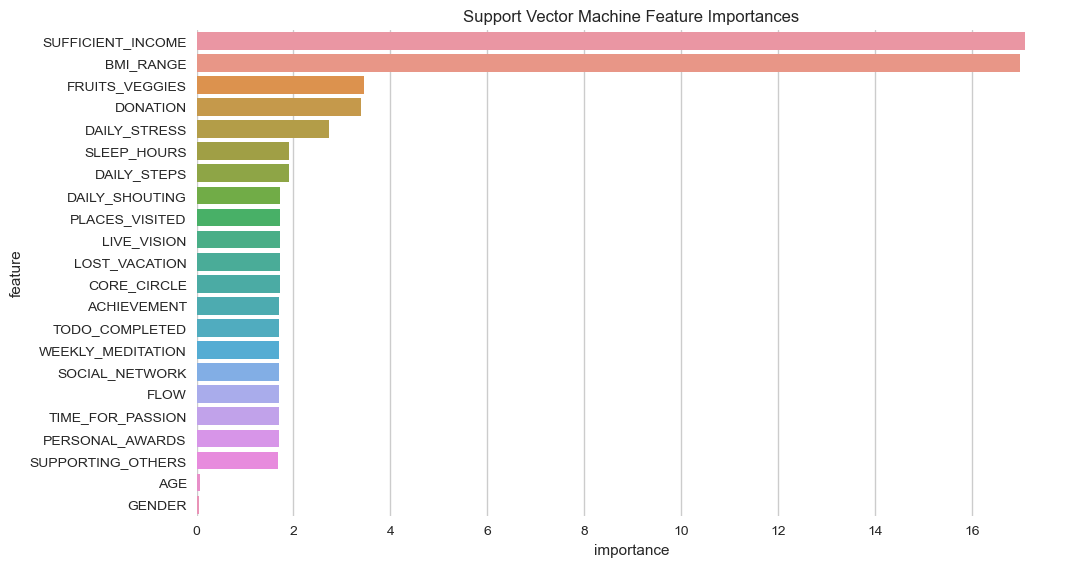

In [203]:
# Get the absolute values of the coefficients
feature_importances = np.abs(svr.coef_[0])
feature_importances = pd.DataFrame({'feature': X_test.columns, 'importance': feature_importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Support Vector Machine Feature Importances')
plt.show()